In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import OrderedDict
import numpy as np
import pickle
import os

In [2]:
yearMap=OrderedDict()
yearMapRev=OrderedDict()
count=0
for year in range(1980,2018):
    yearMap[str(year)]=count
    yearMapRev[count]=str(year)
    count+=1

In [3]:
stateCodes=pickle.load(open("stateCode.pickle","rb"))
paths=[str(i)+'/' for i in stateCodes]

data={}
for path in paths:
    key=path[:-1]
    for year in yearMap:
        extendedPath=path+"Data/o3/"+year
        counties=os.listdir(extendedPath)
        if key not in data:
            data[key]=OrderedDict()
        if year not in data[key]:
            data[key][year]=[]
            
        for county in counties:
            temp=pickle.load(open(extendedPath+"/"+county,"rb"))
            temp=list(filter(lambda x:x!='-',temp))
            data[key][year].extend(temp)
        if len(data[key][year])!=0:
            tempList=data[key][year]
            data[key][year]=[np.percentile(tempList,10),np.percentile(tempList,90),np.median(tempList),np.mean(tempList),max(tempList),min(tempList)]
        else:
            data[key][year]=[None,None,None,None,None,None]
    
       

In [5]:
pickle.dump(data,open("ozoneConc/ozoneConcentration.pickle","wb"))

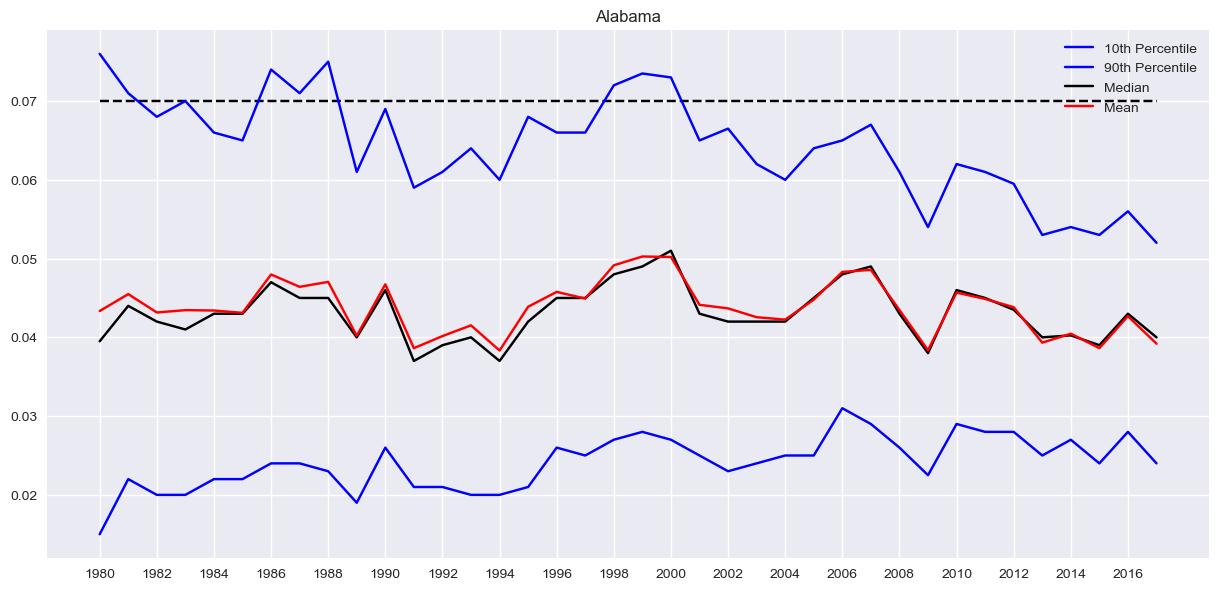

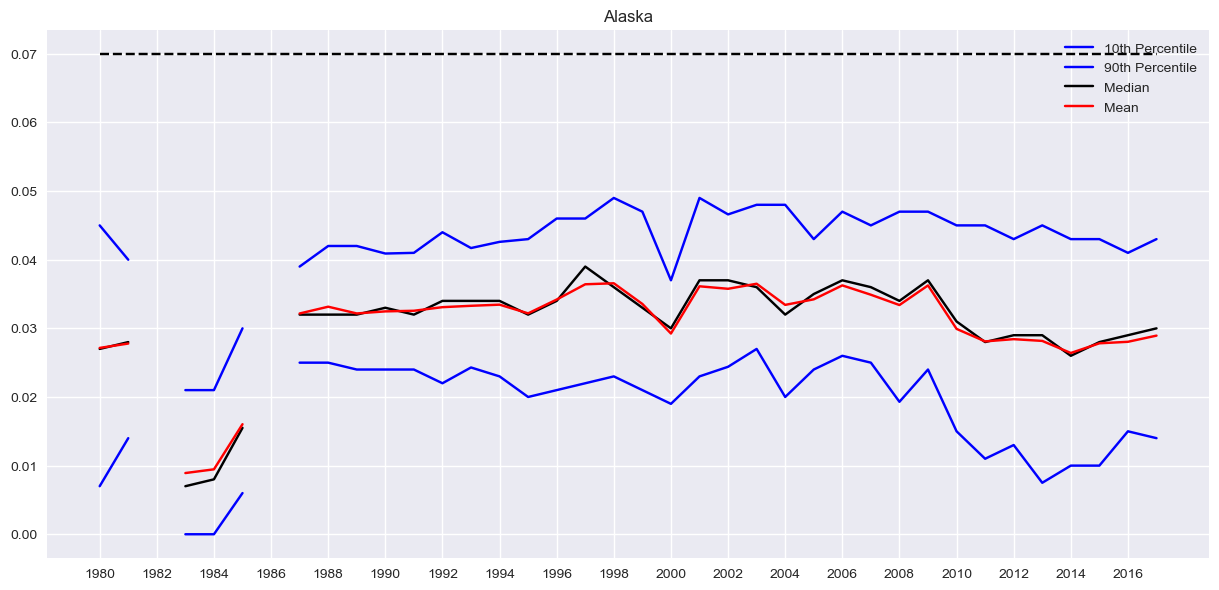

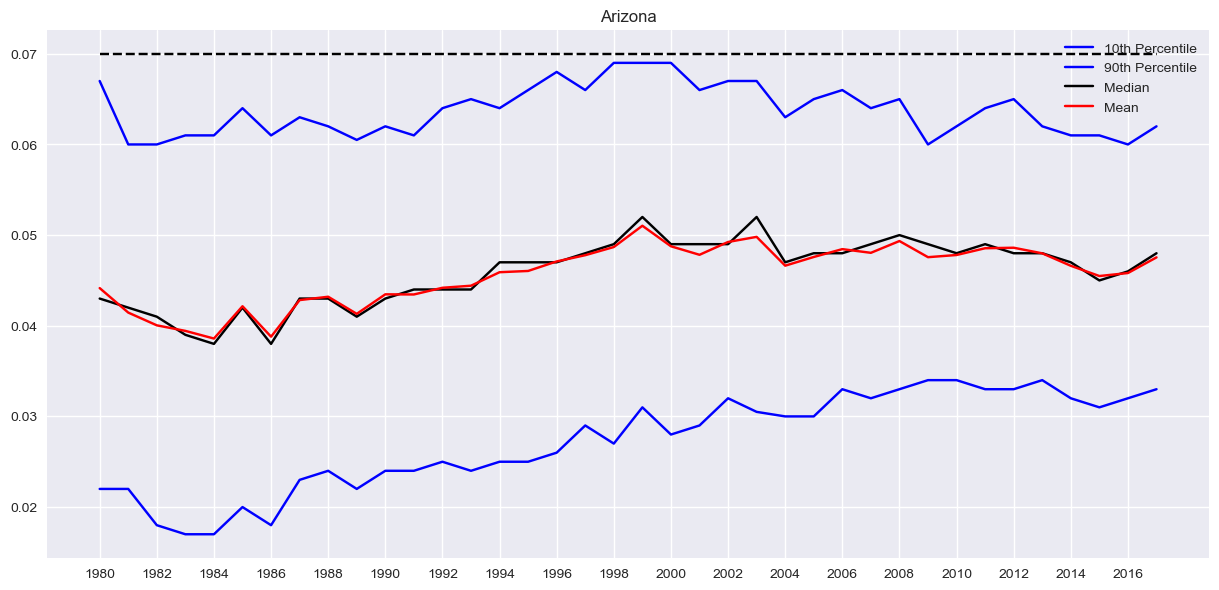

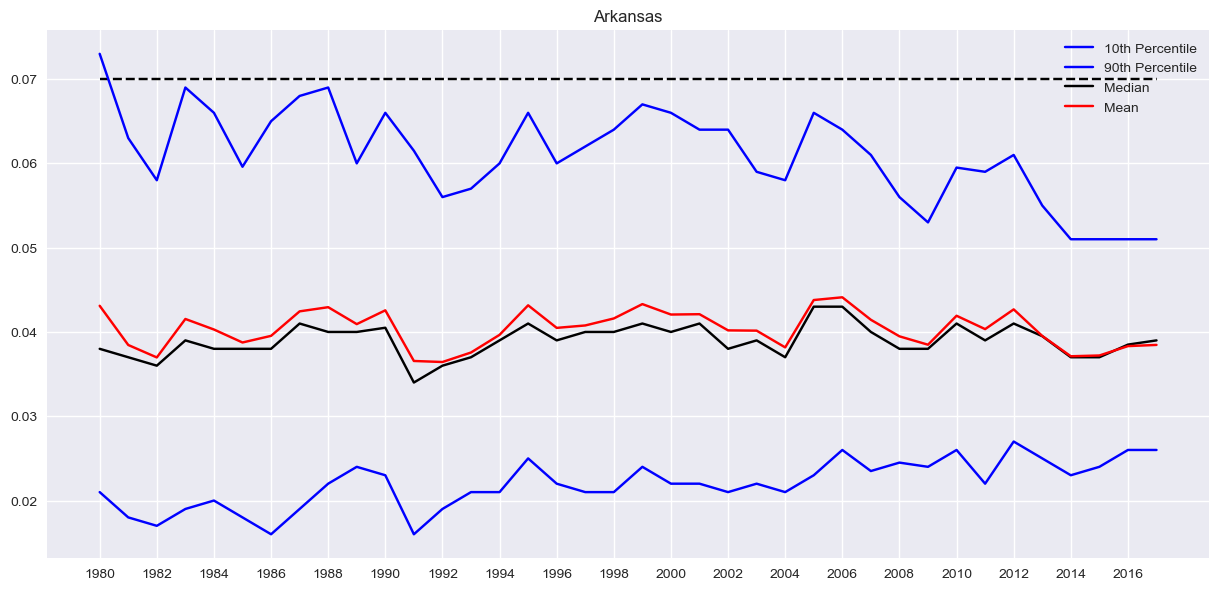

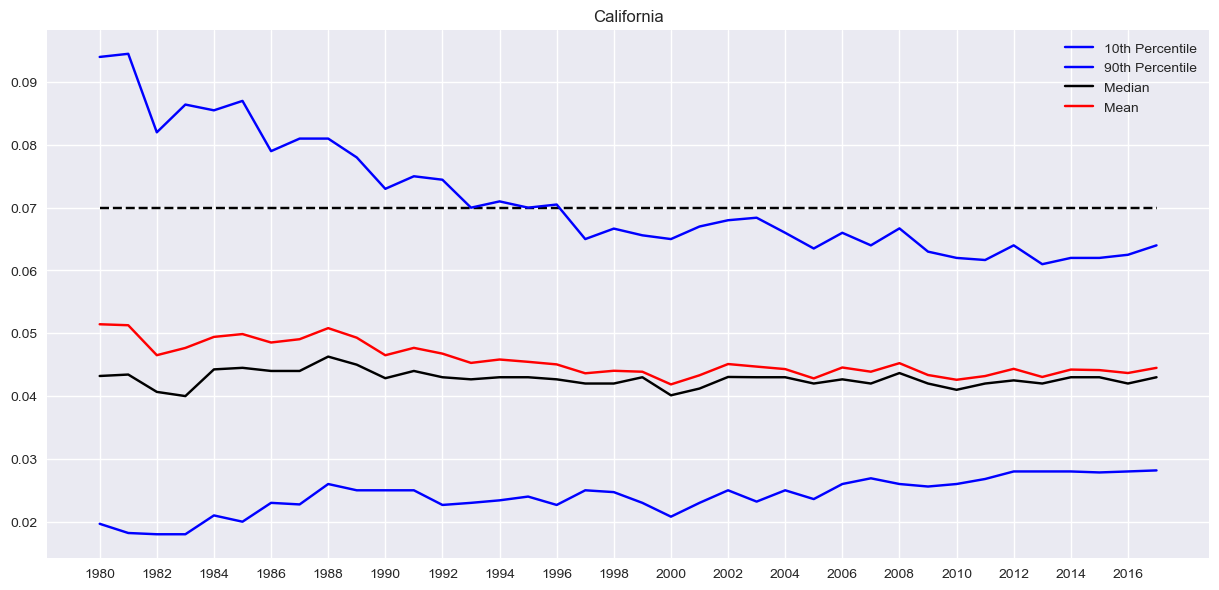

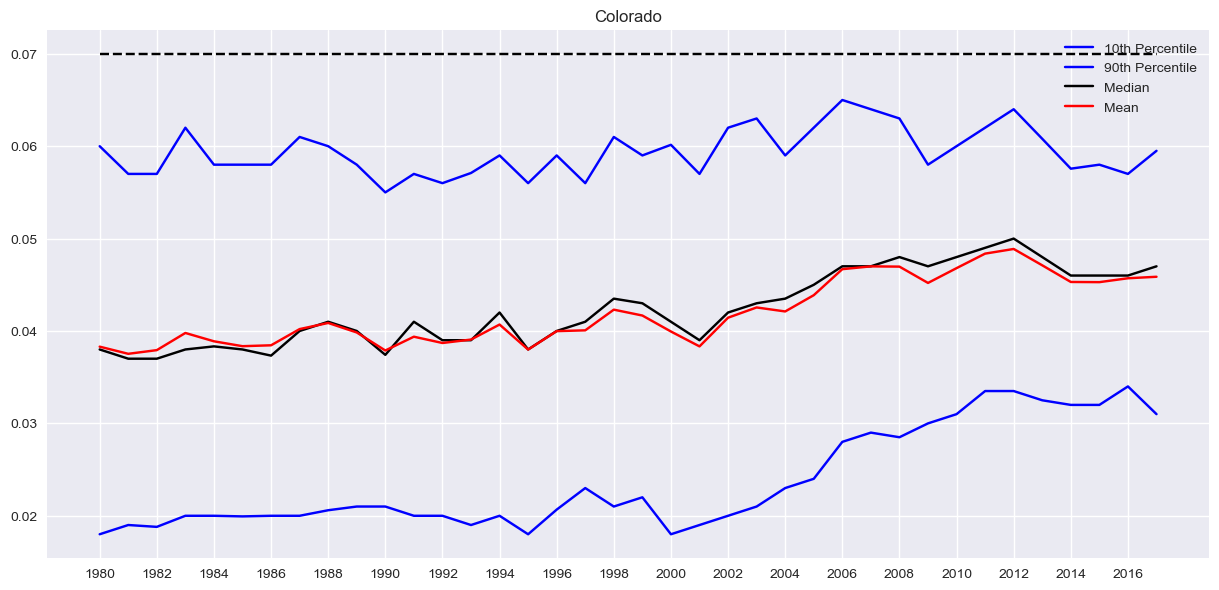

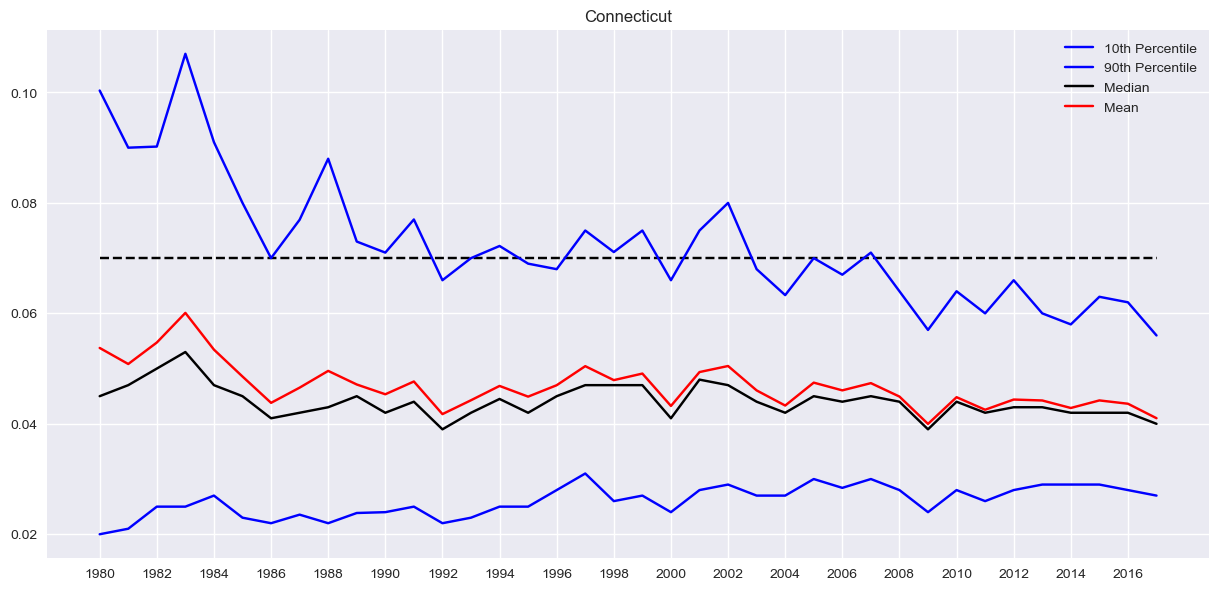

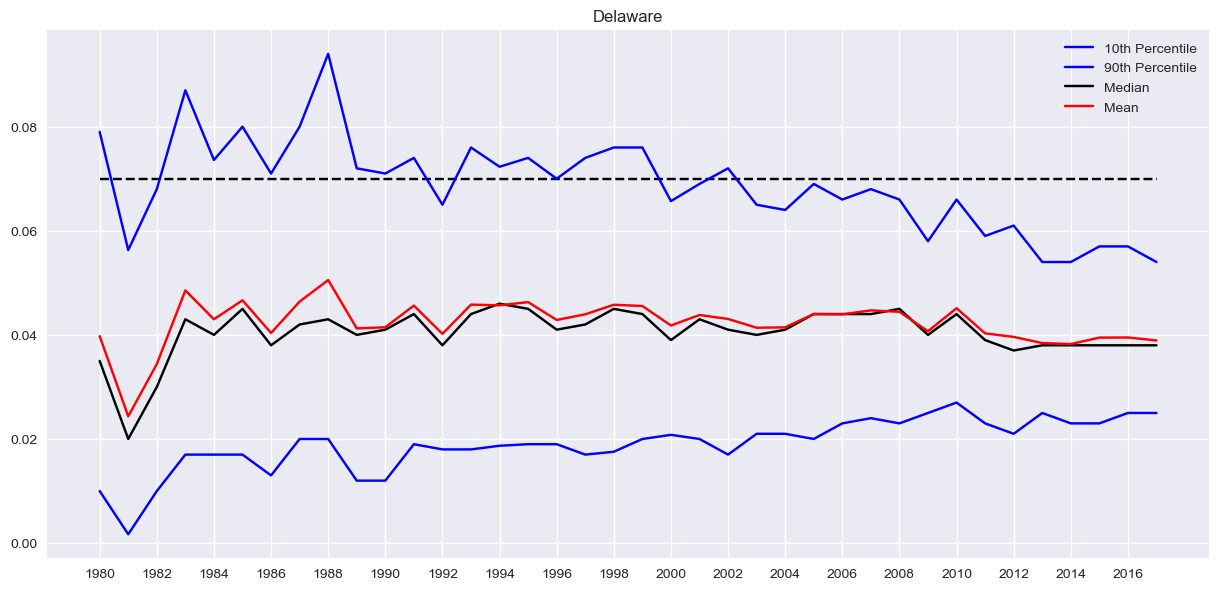

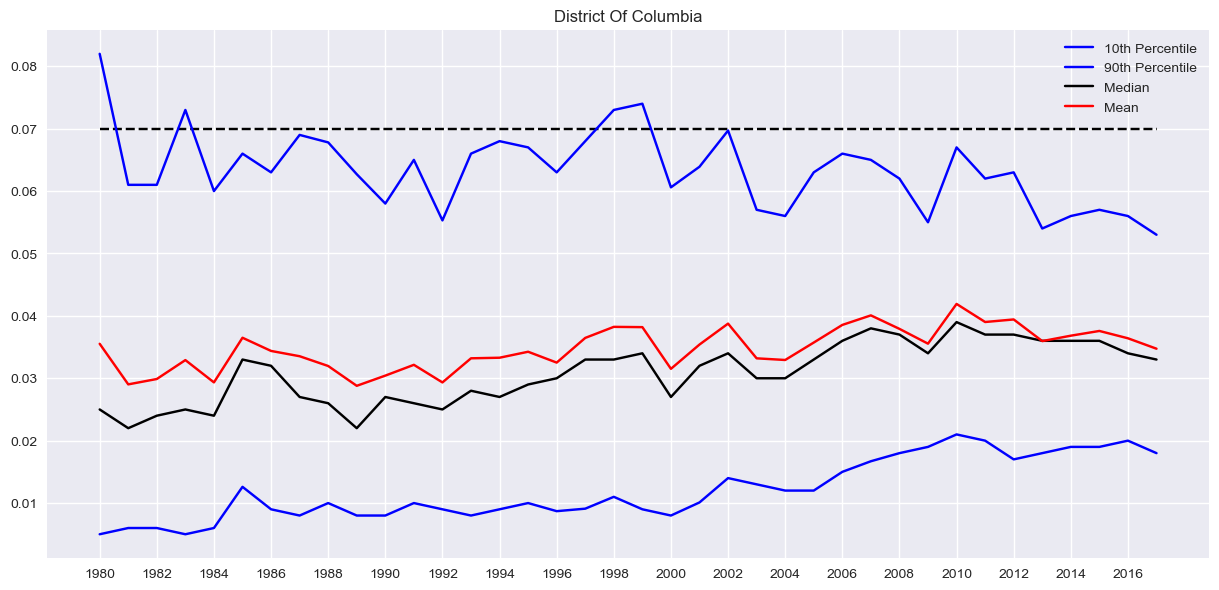

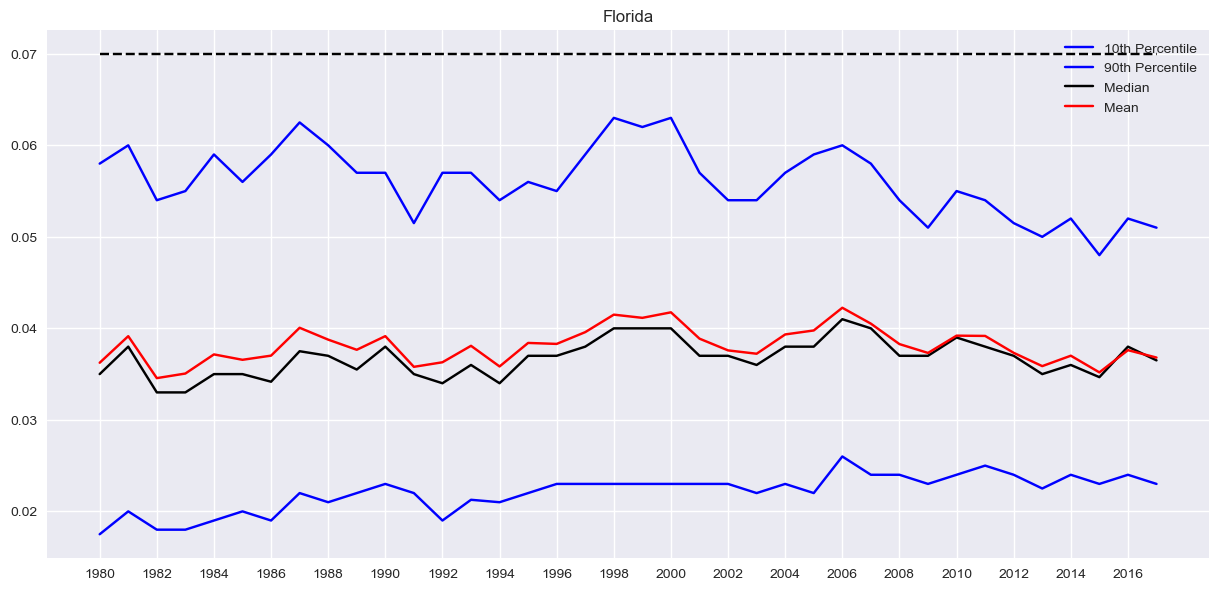

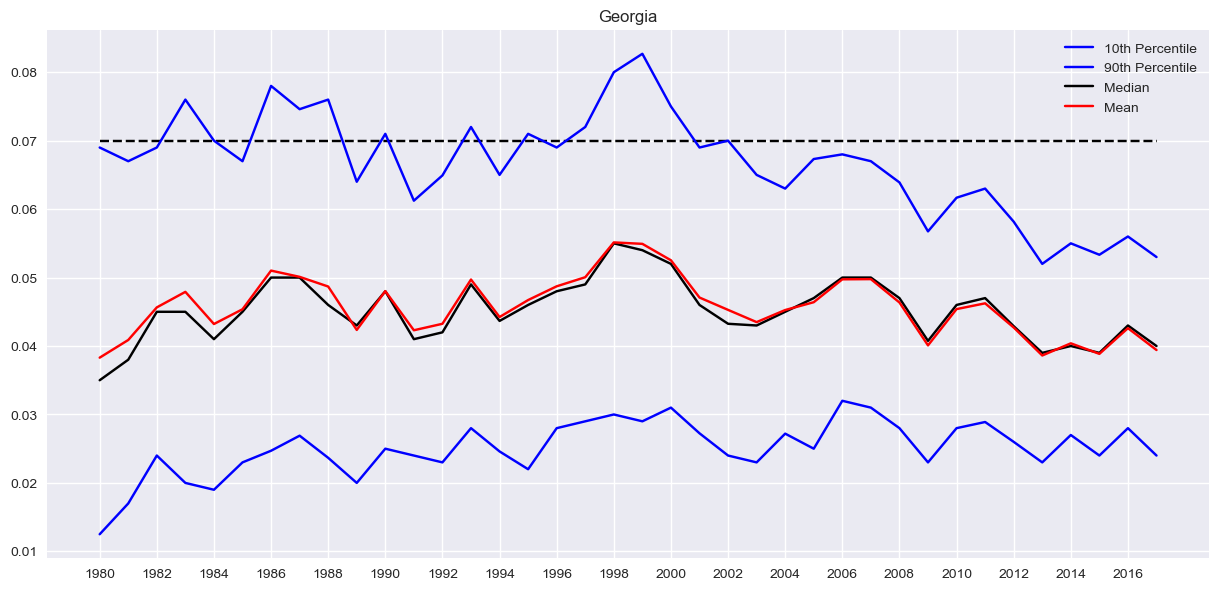

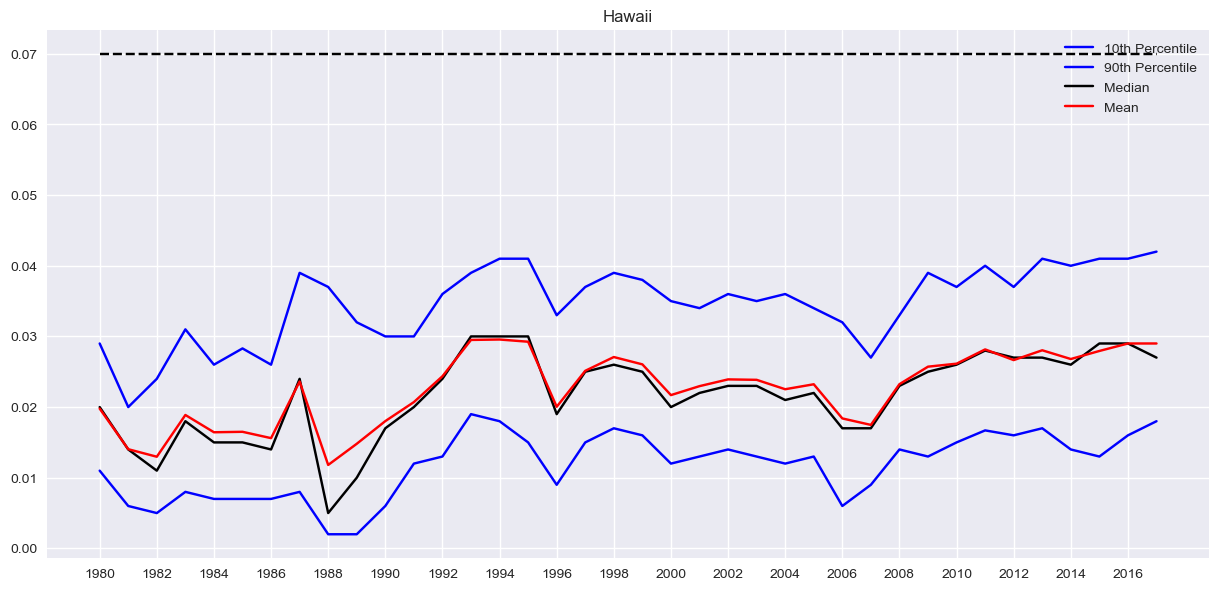

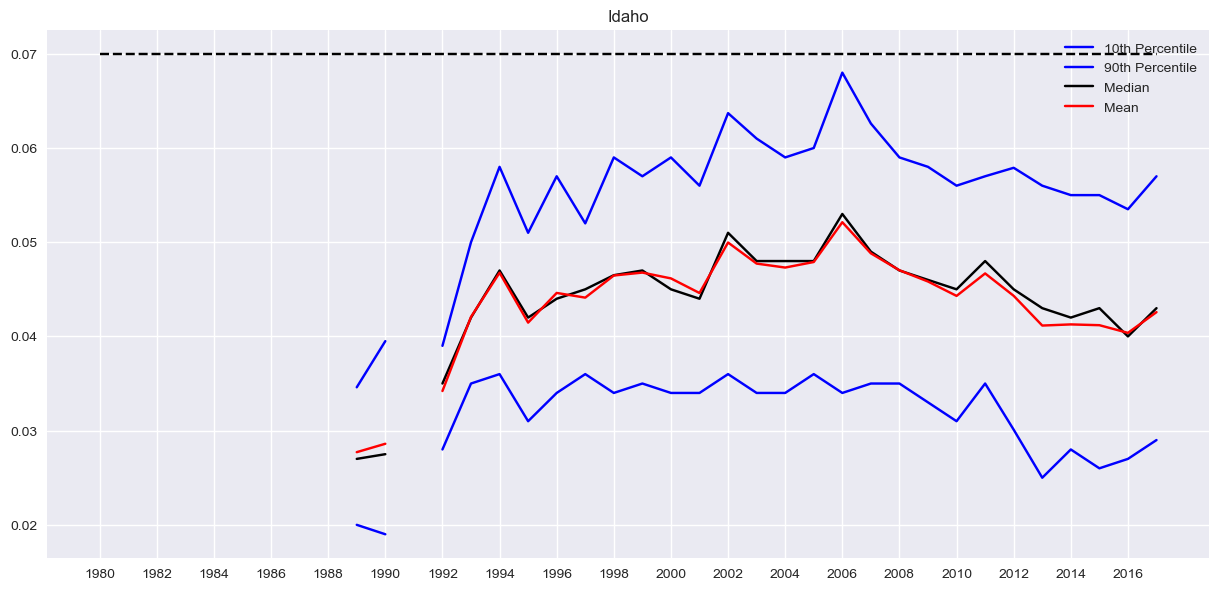

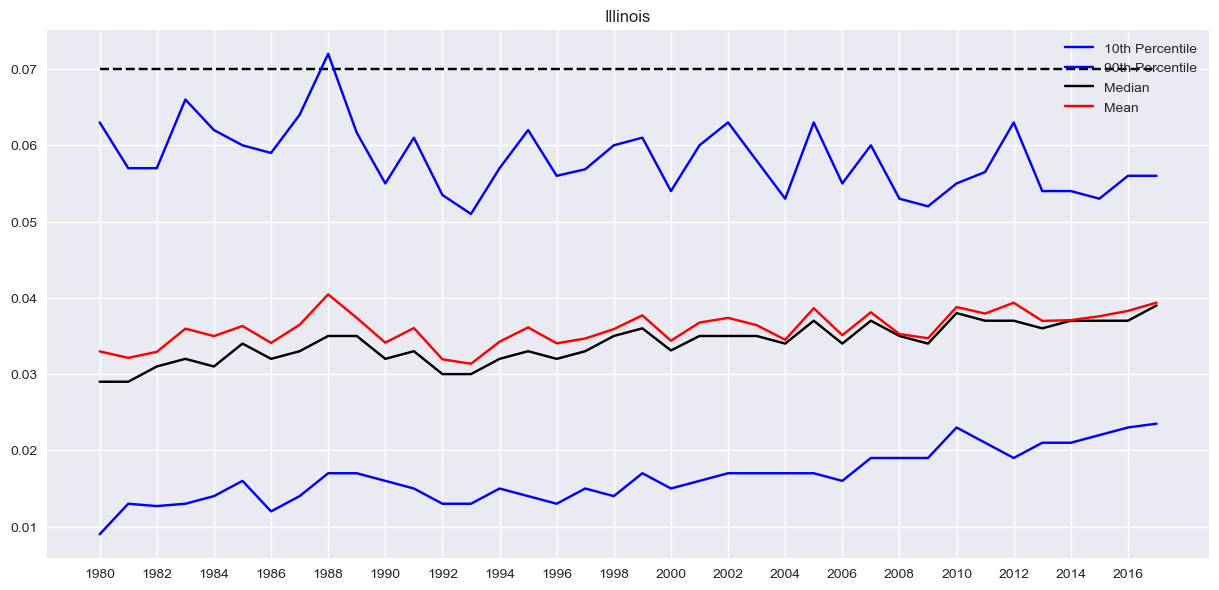

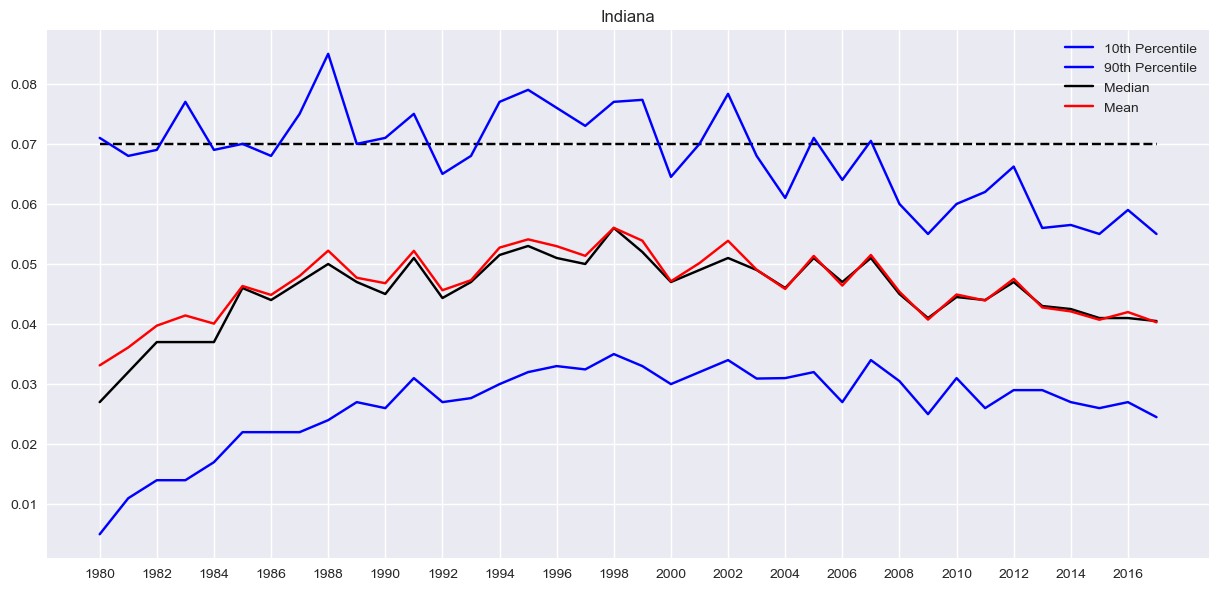

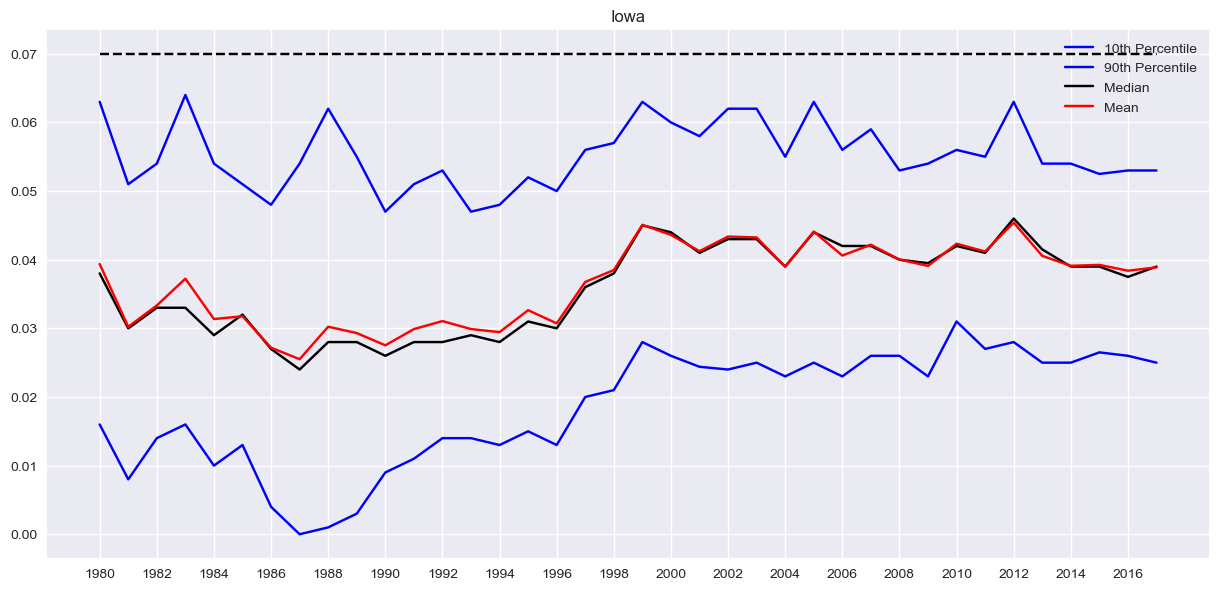

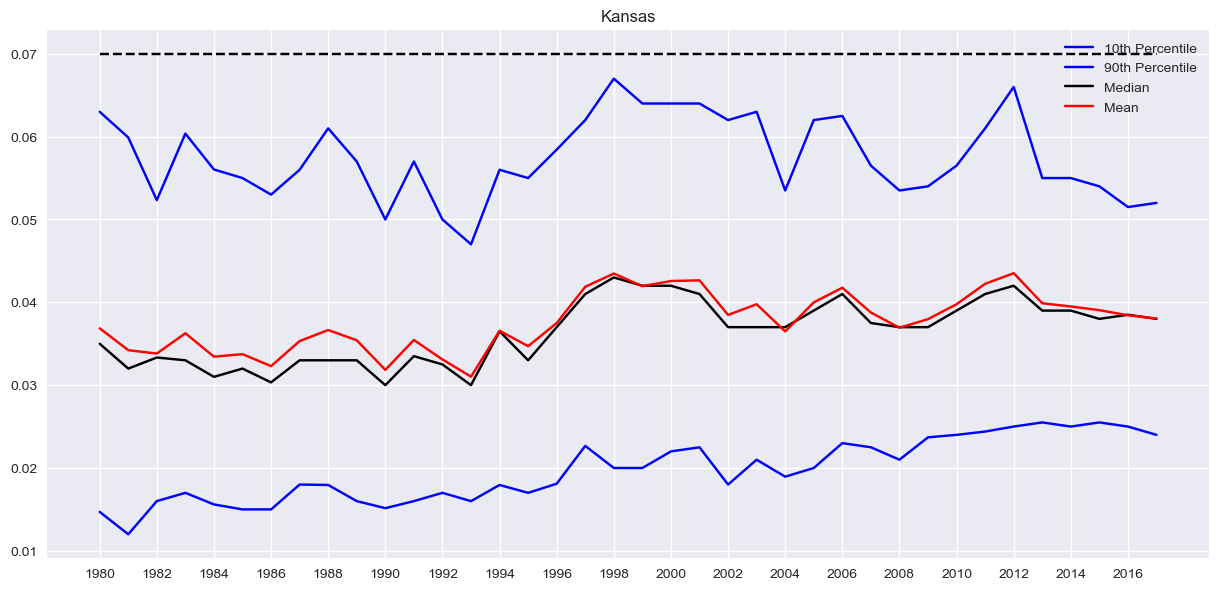

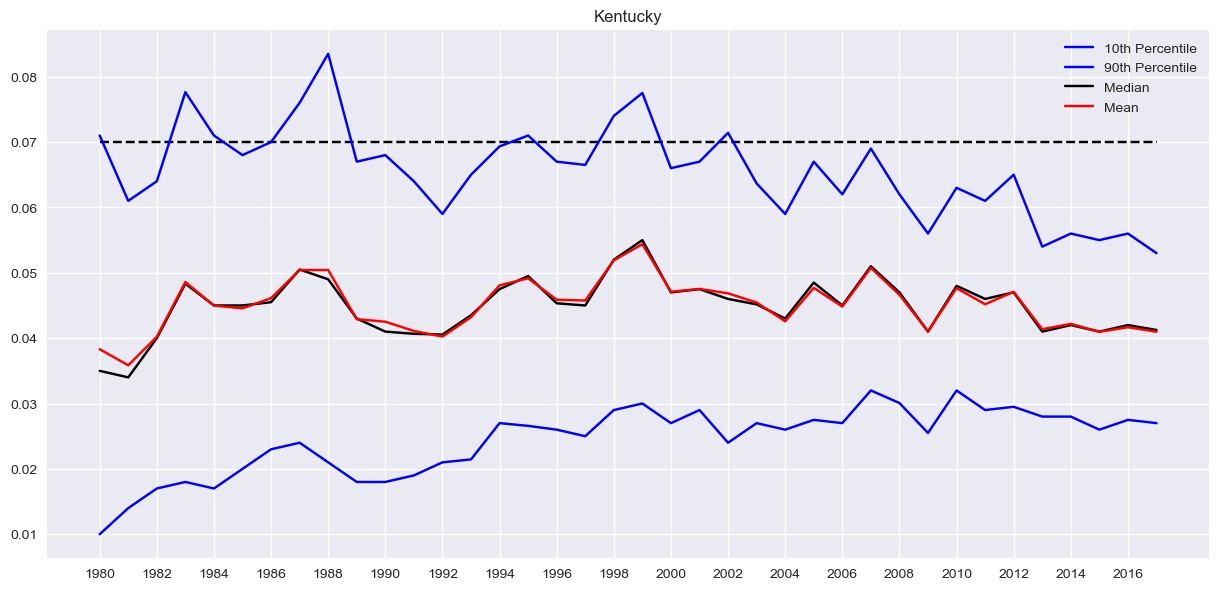

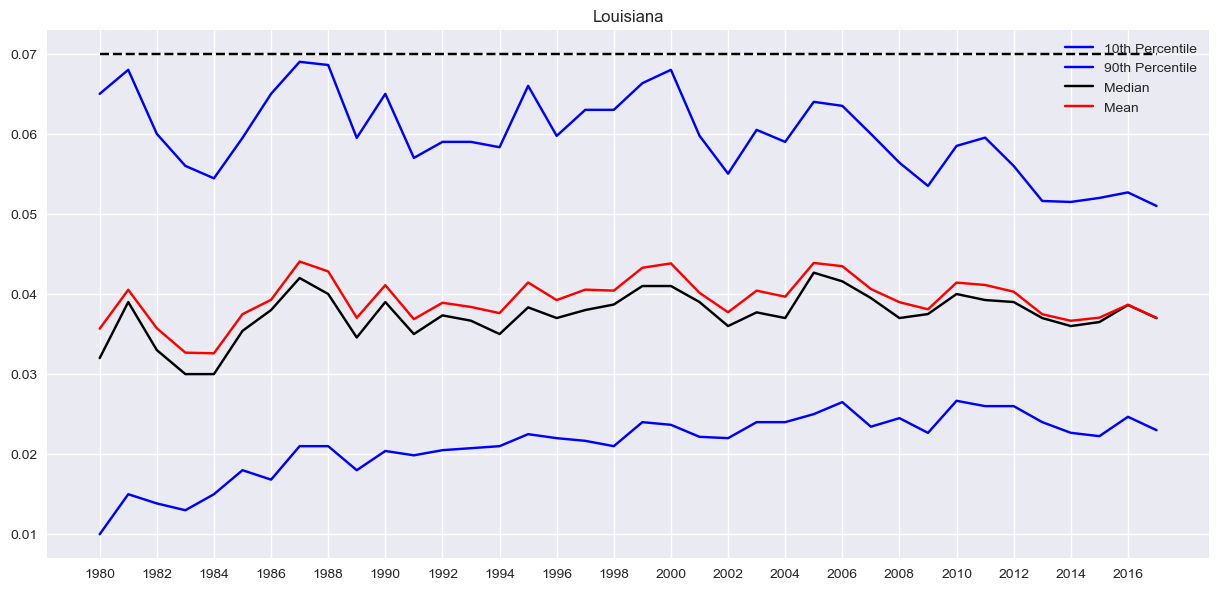

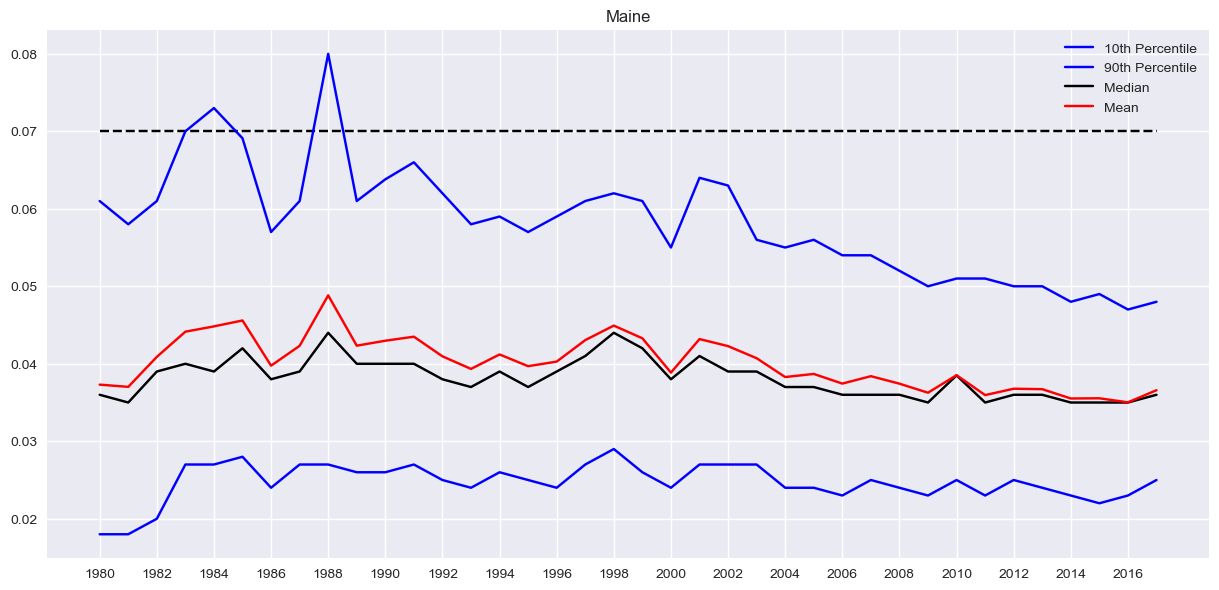

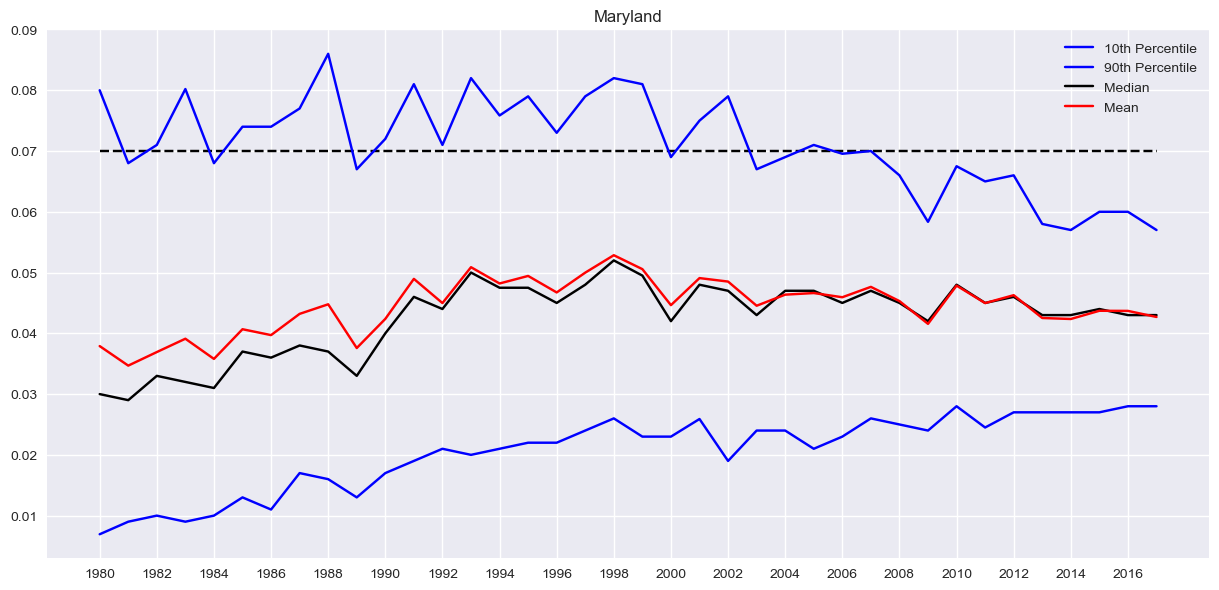

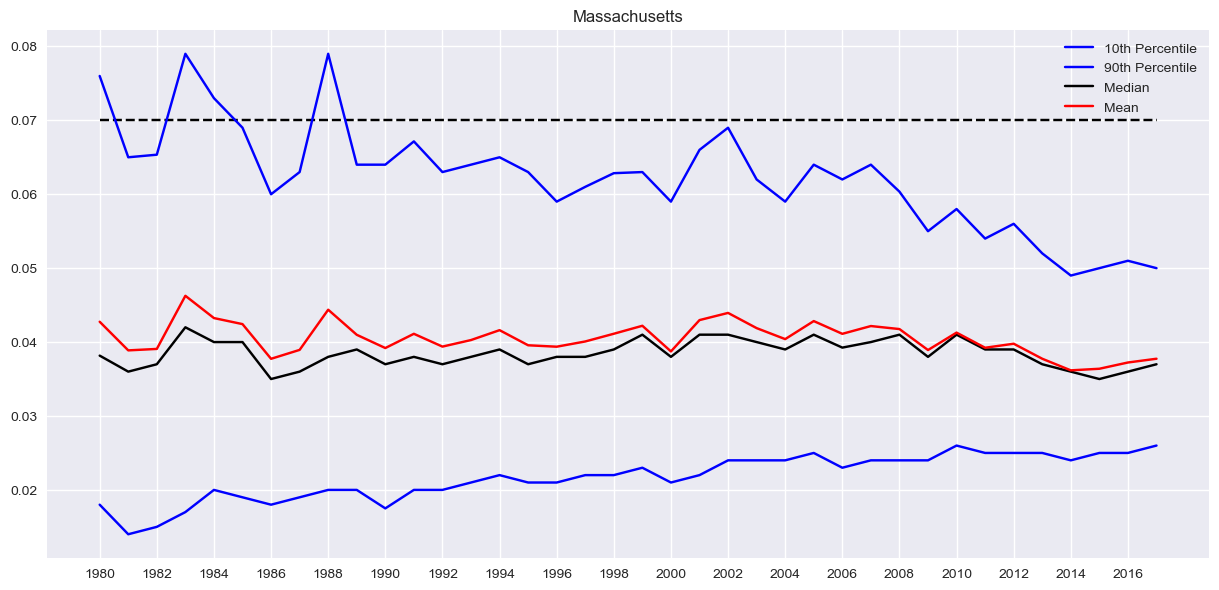

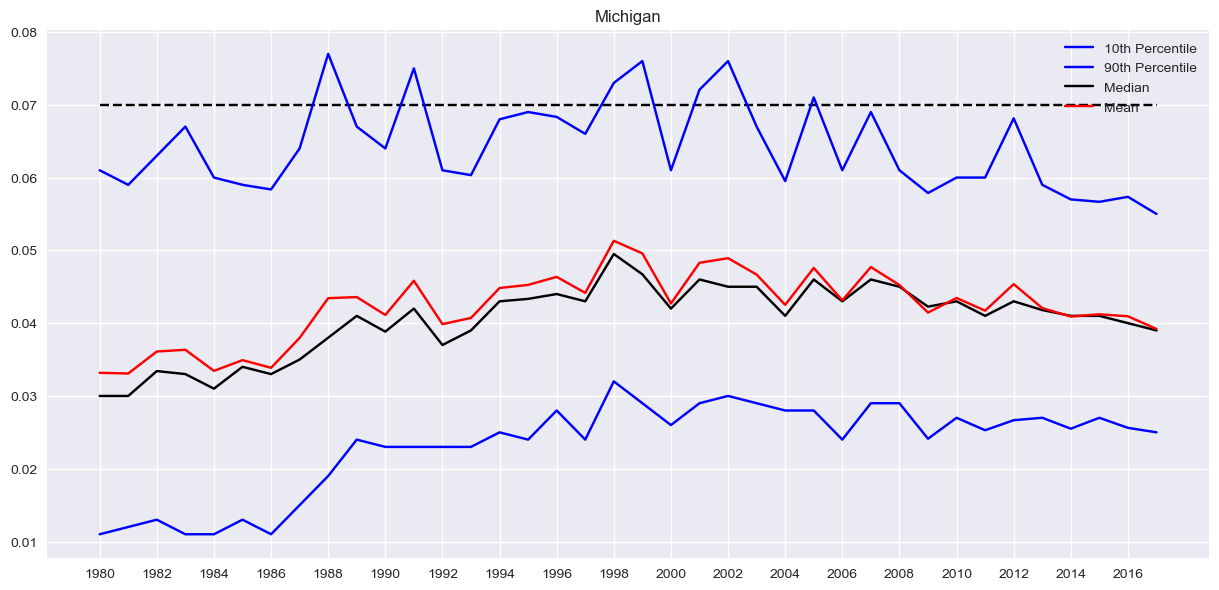

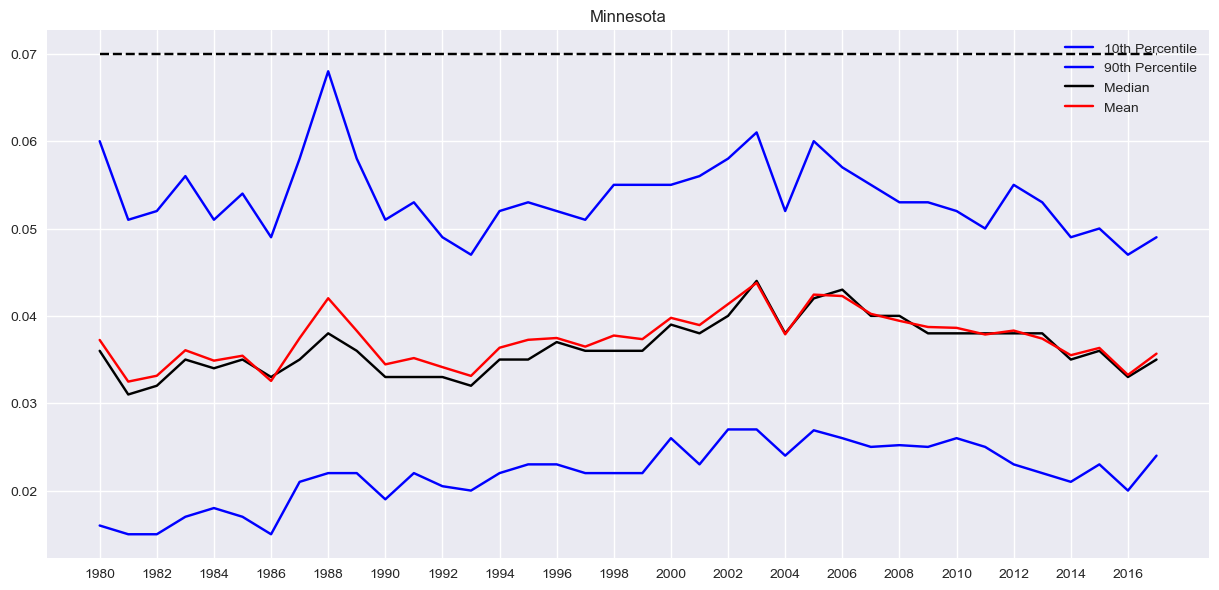

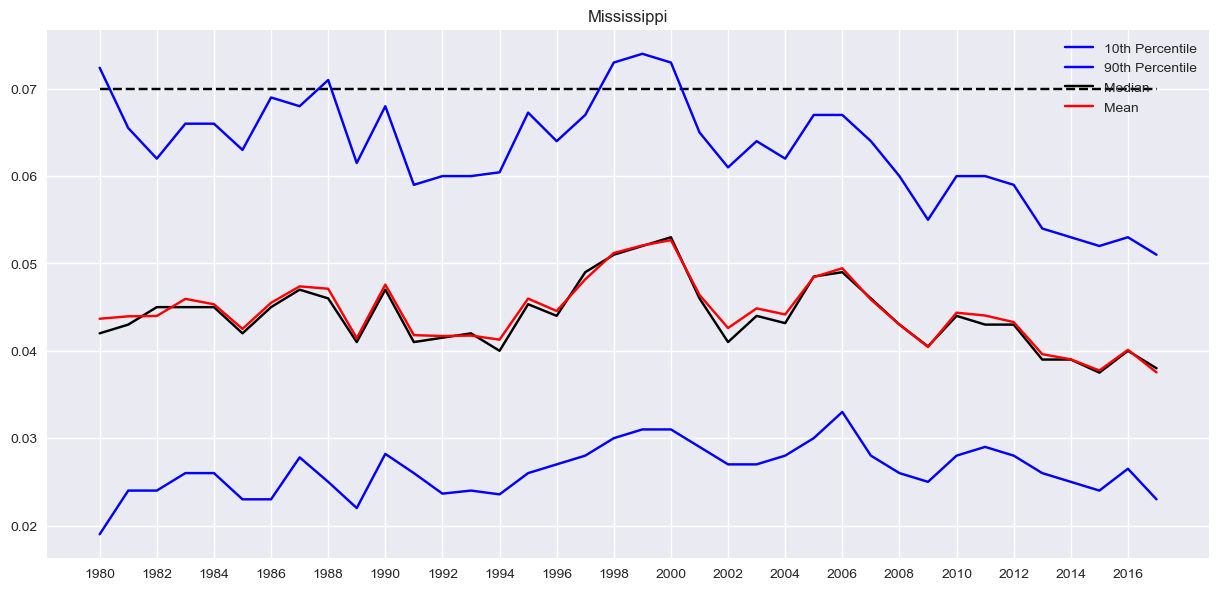

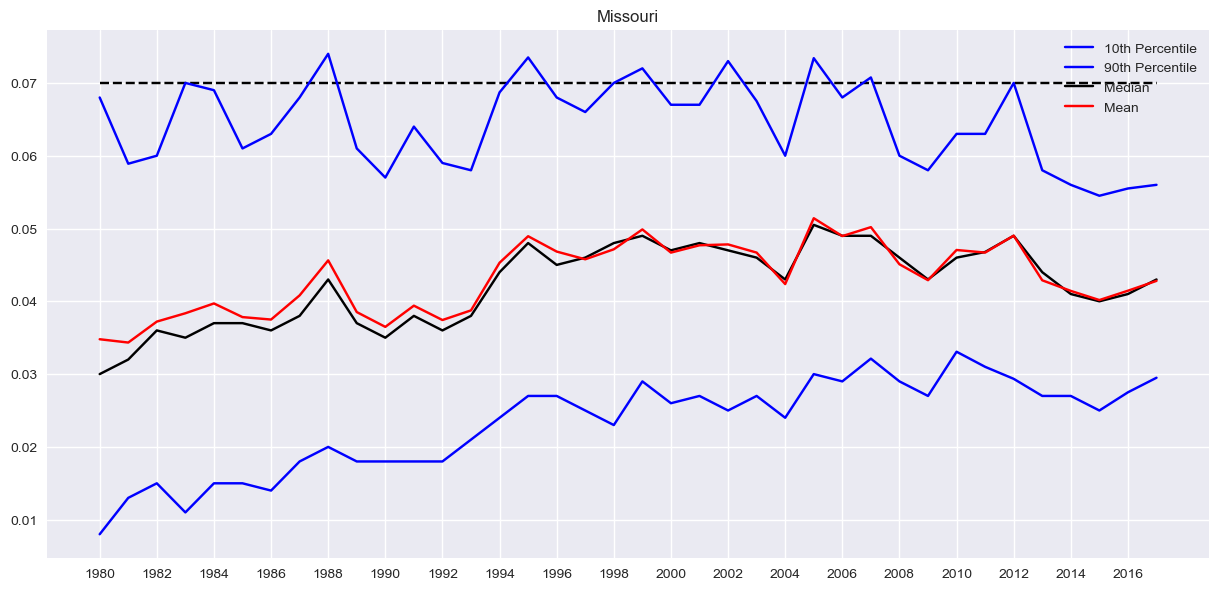

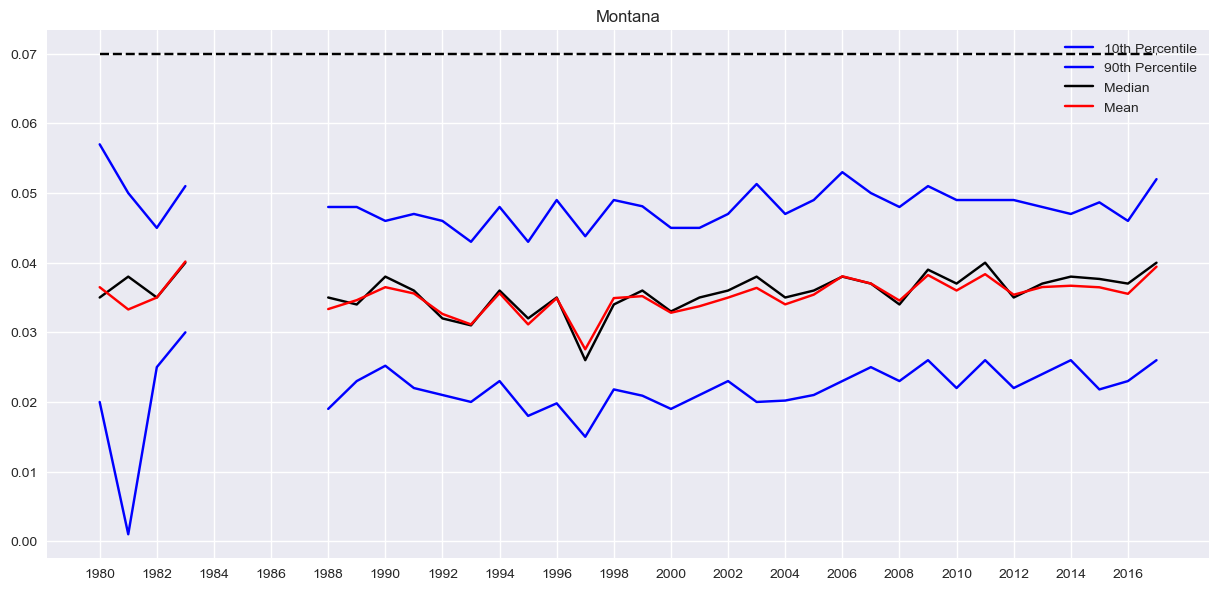

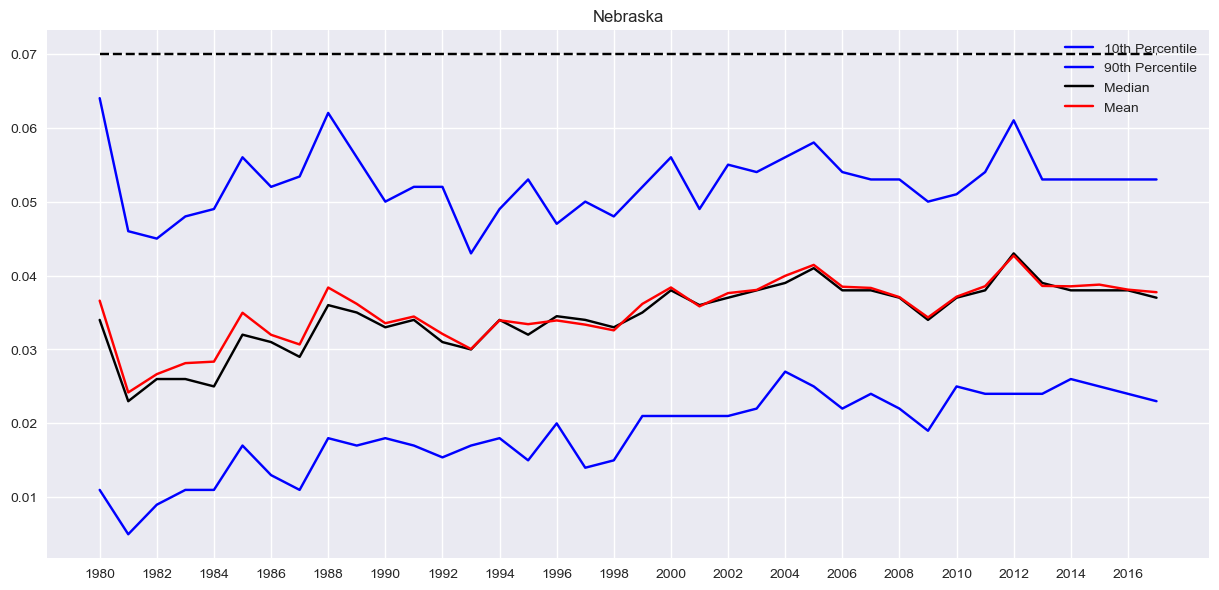

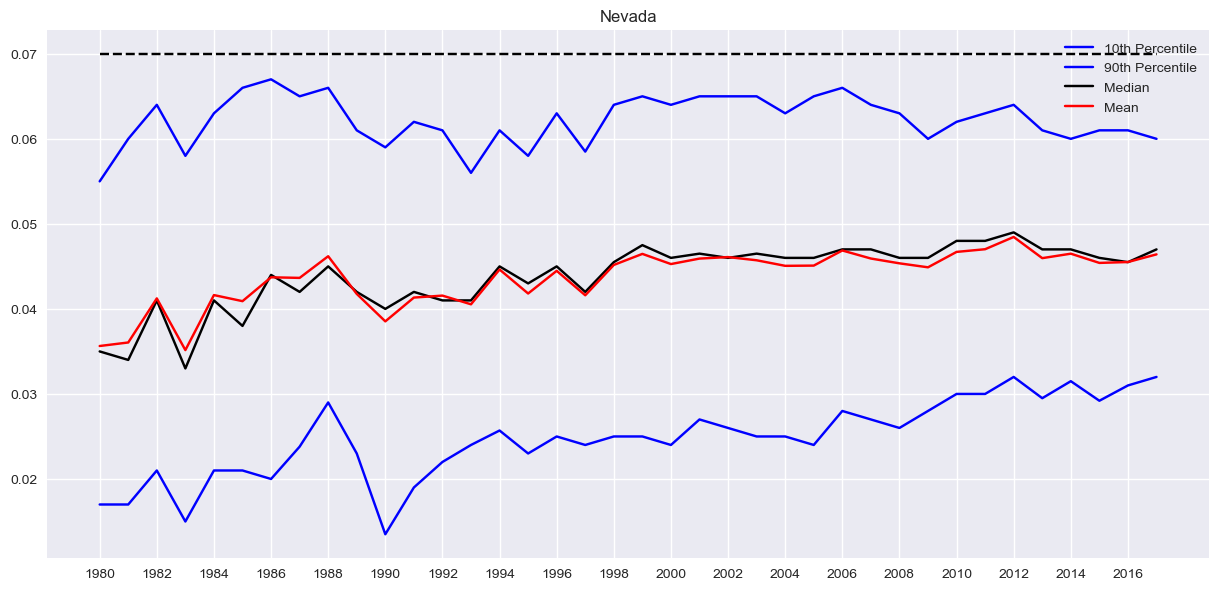

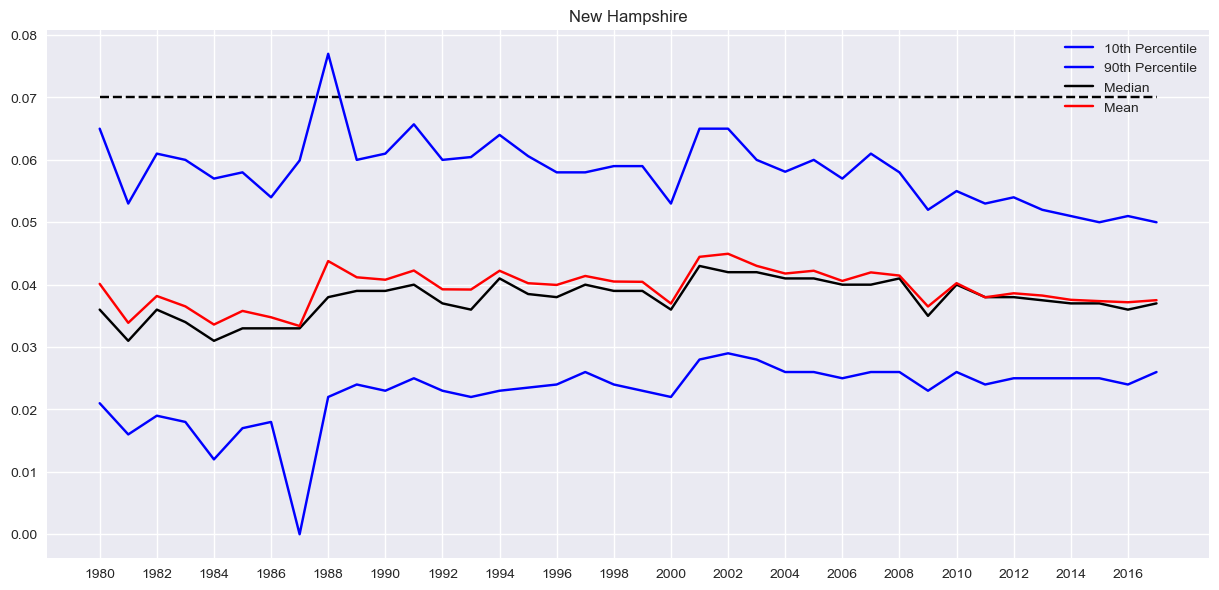

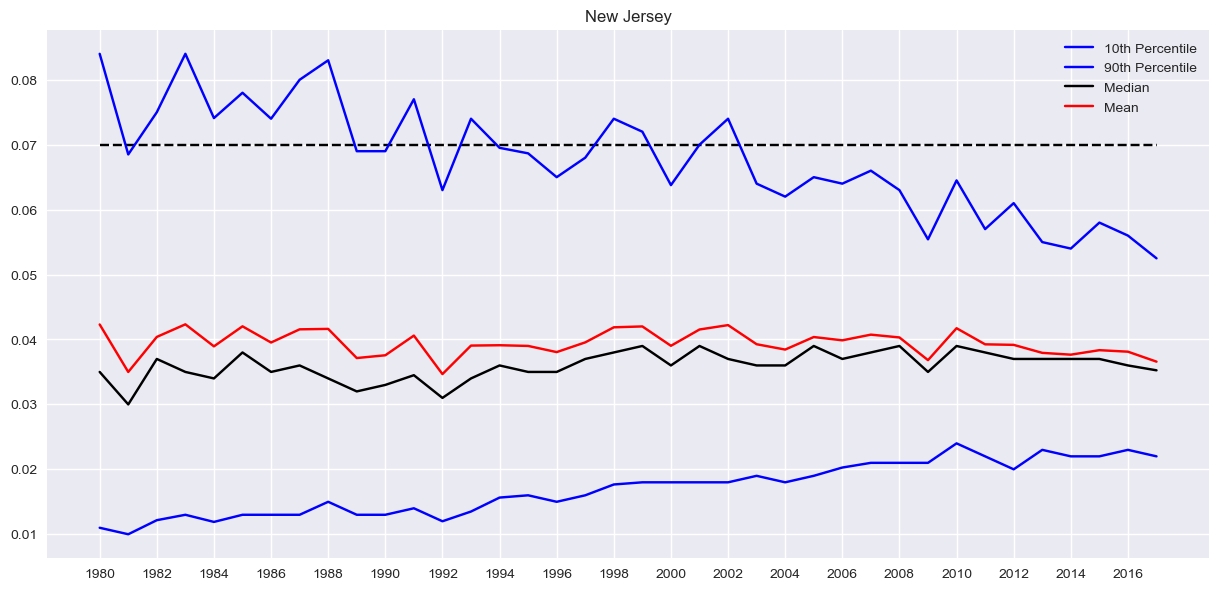

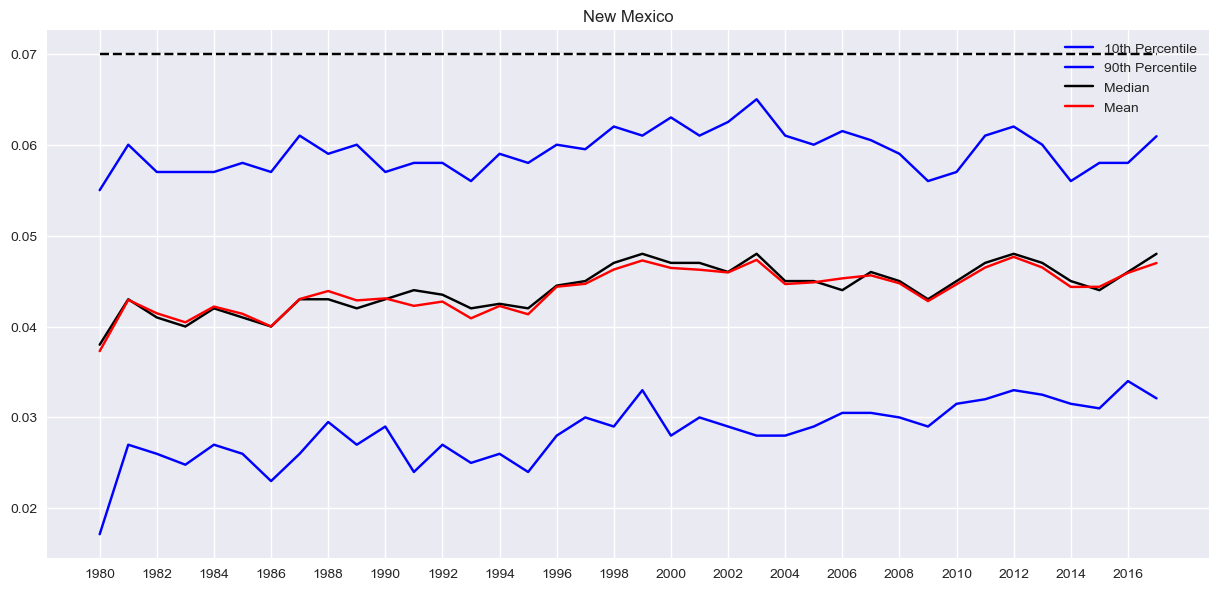

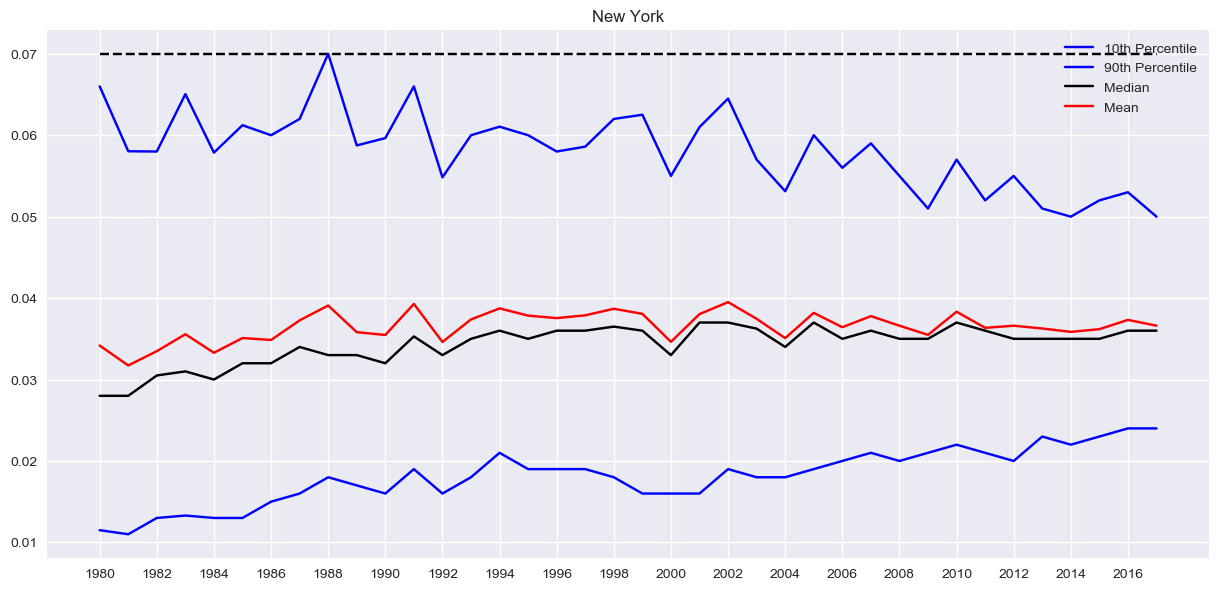

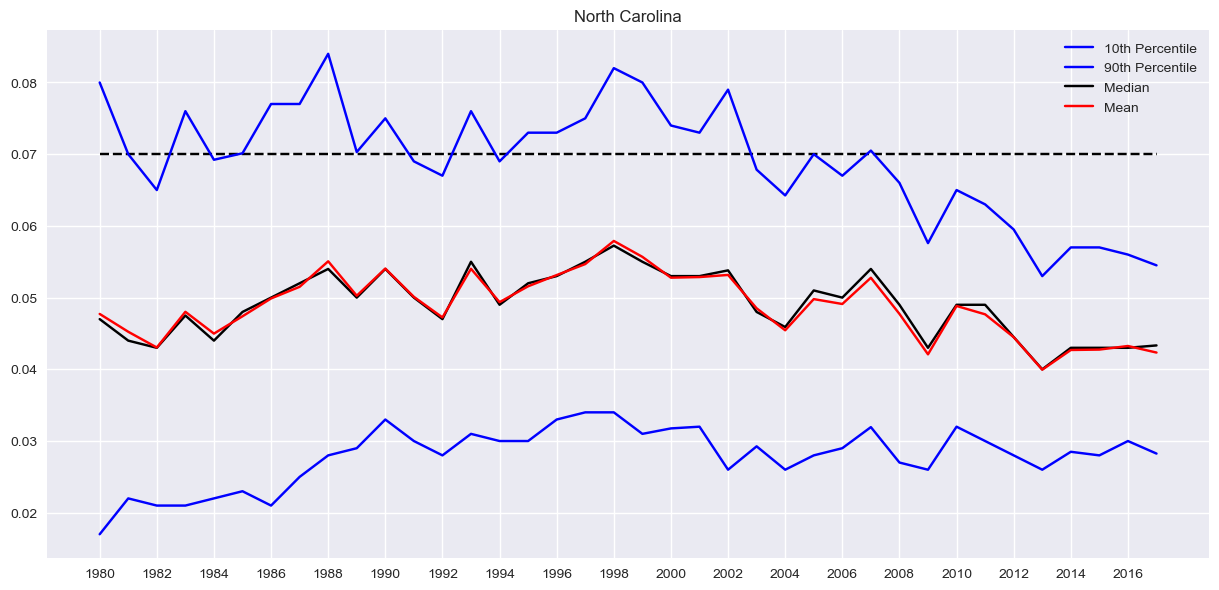

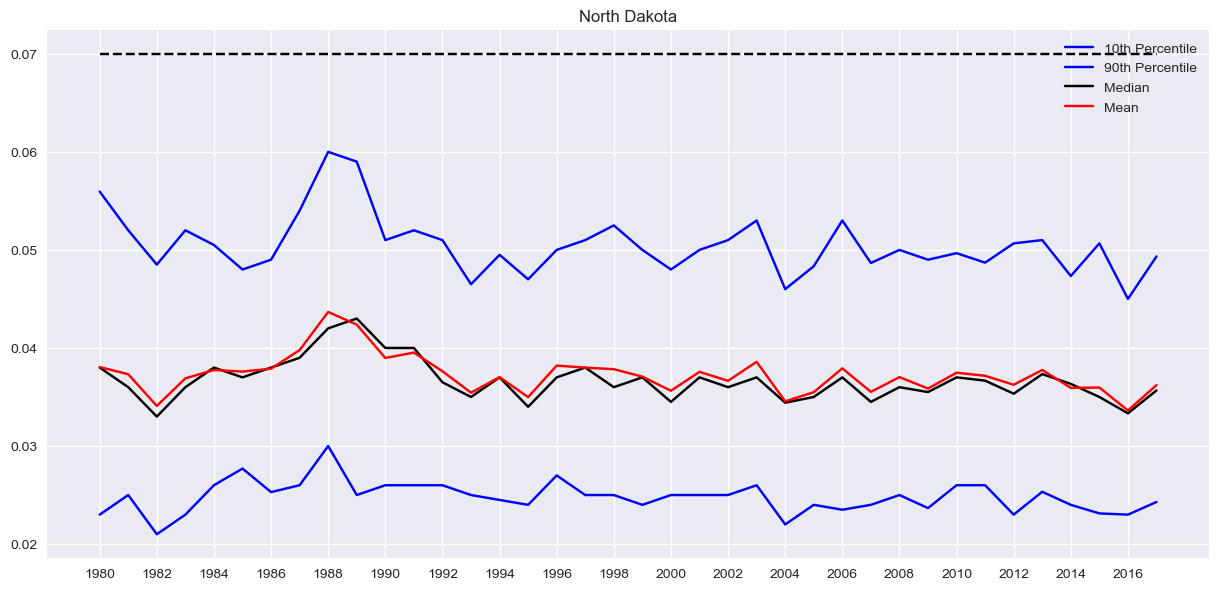

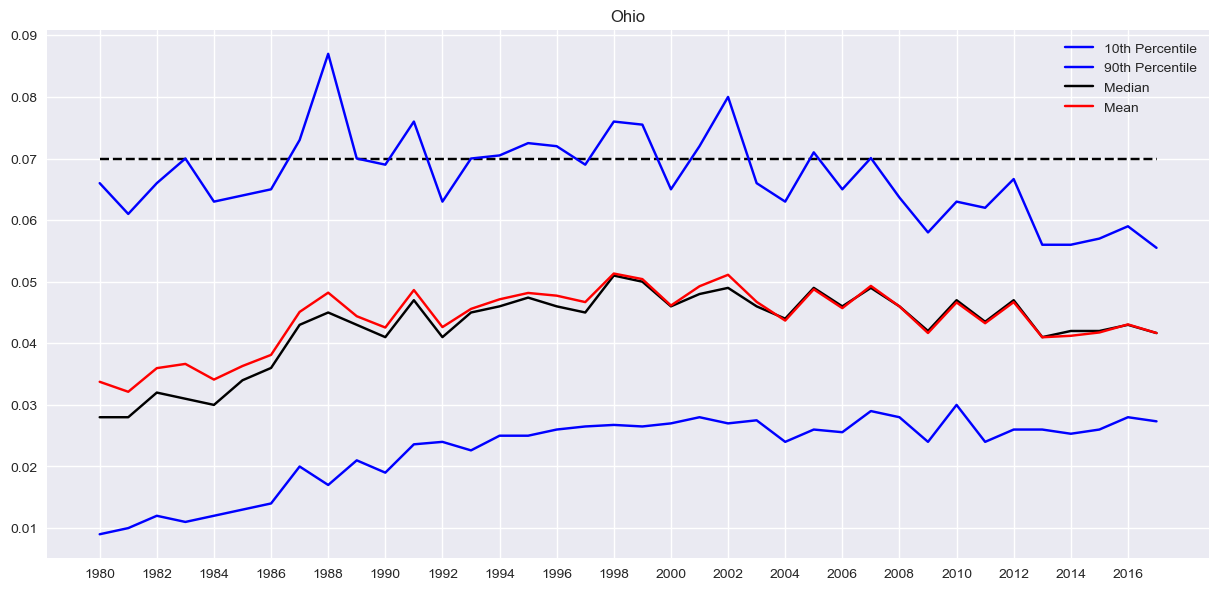

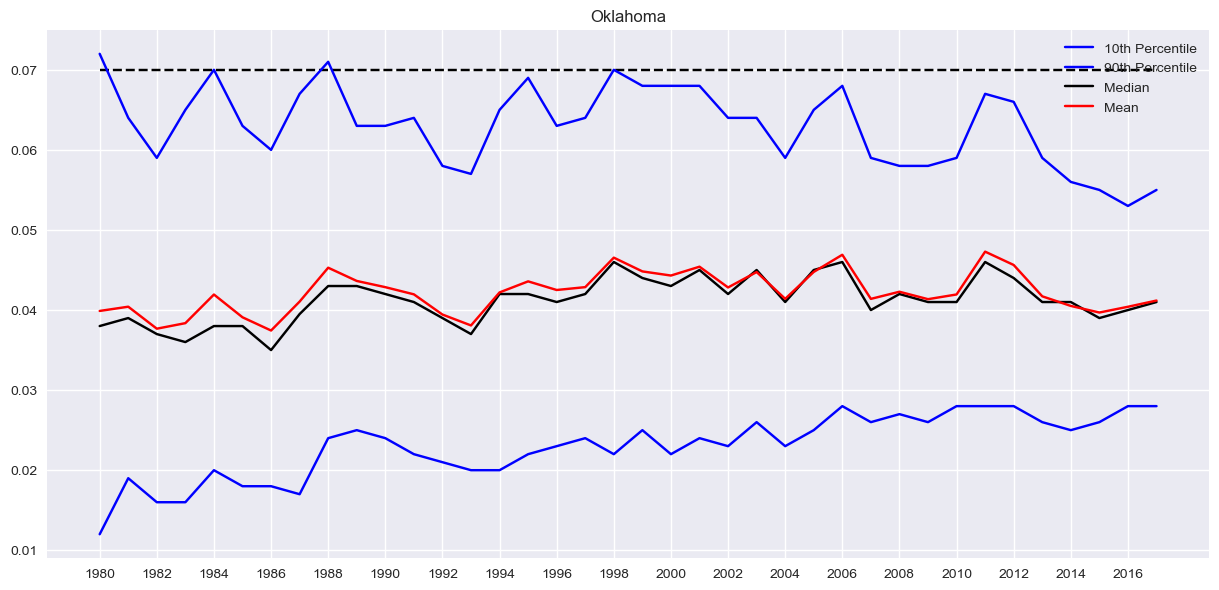

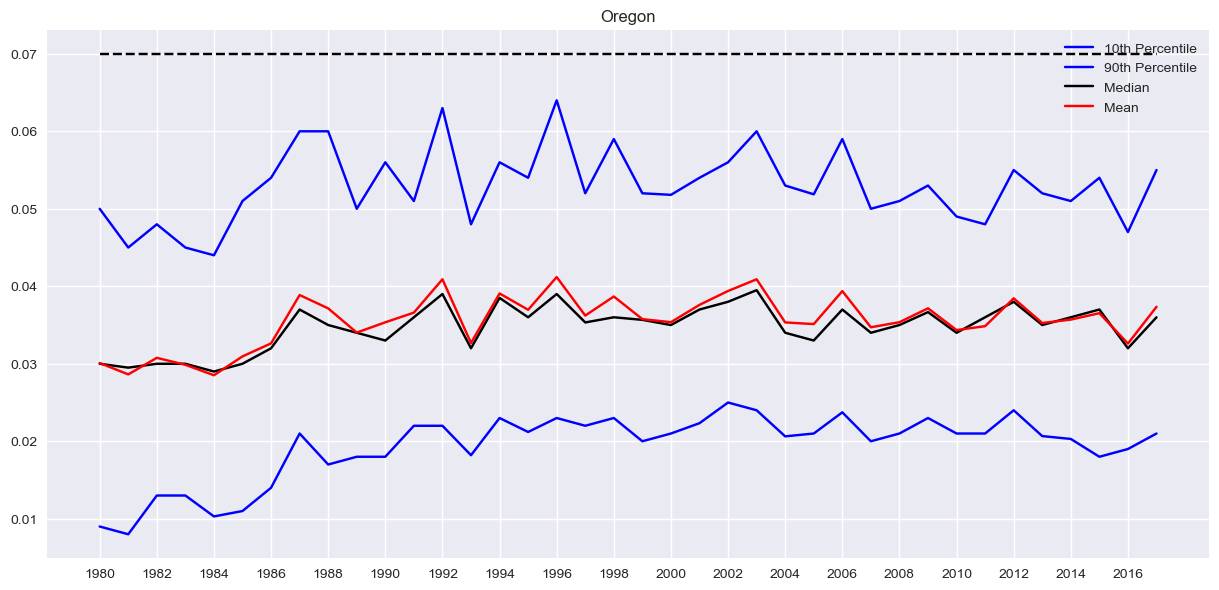

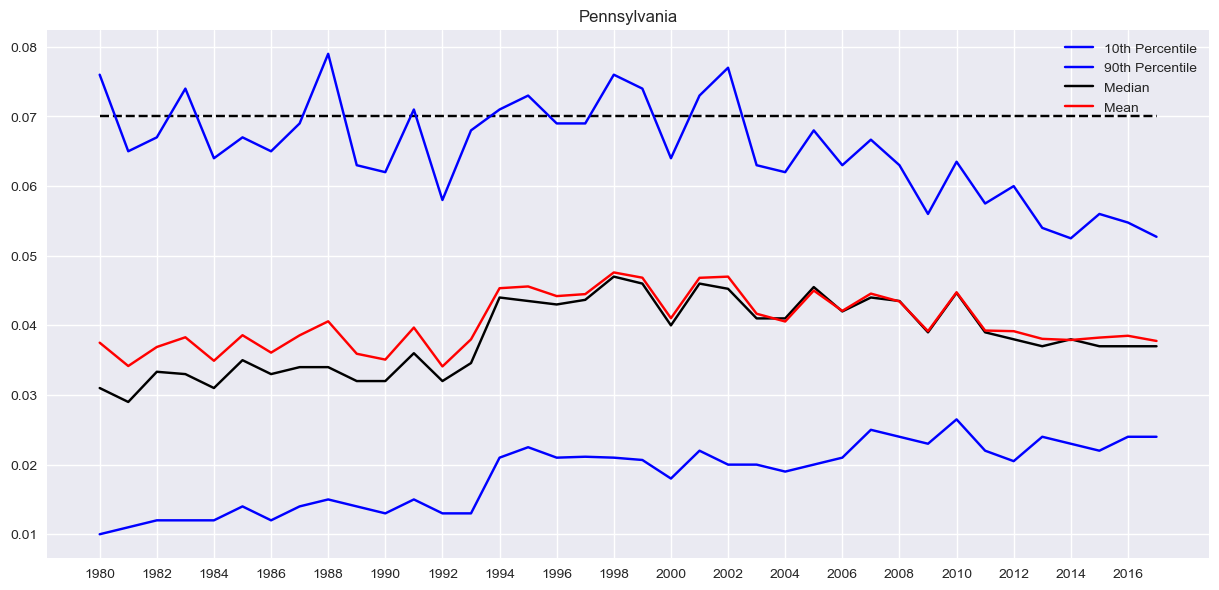

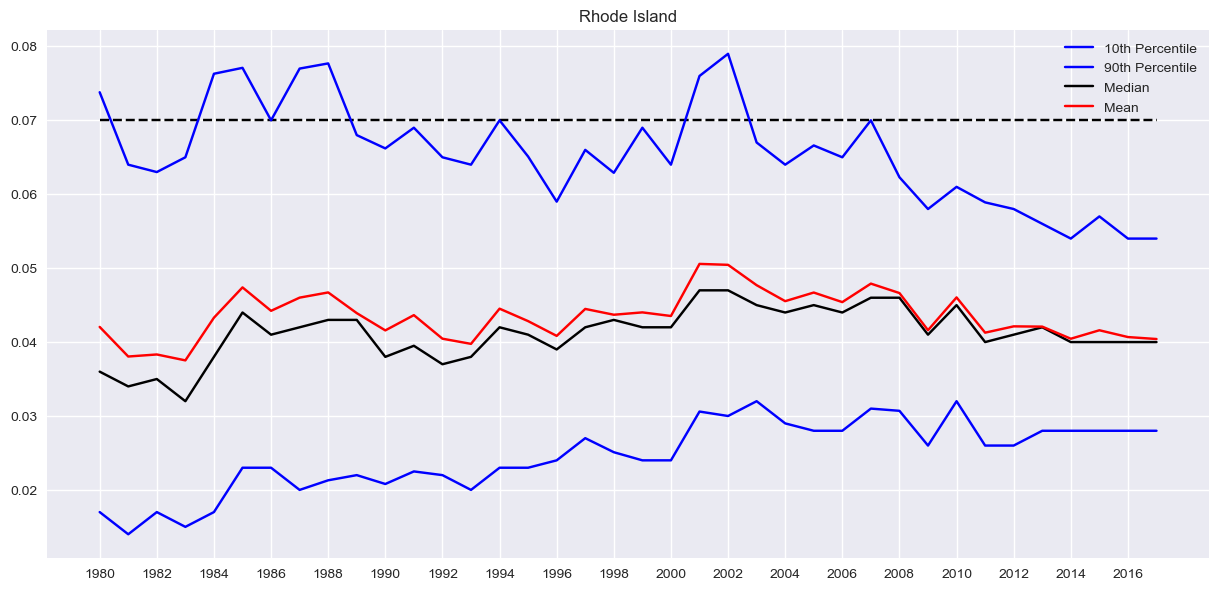

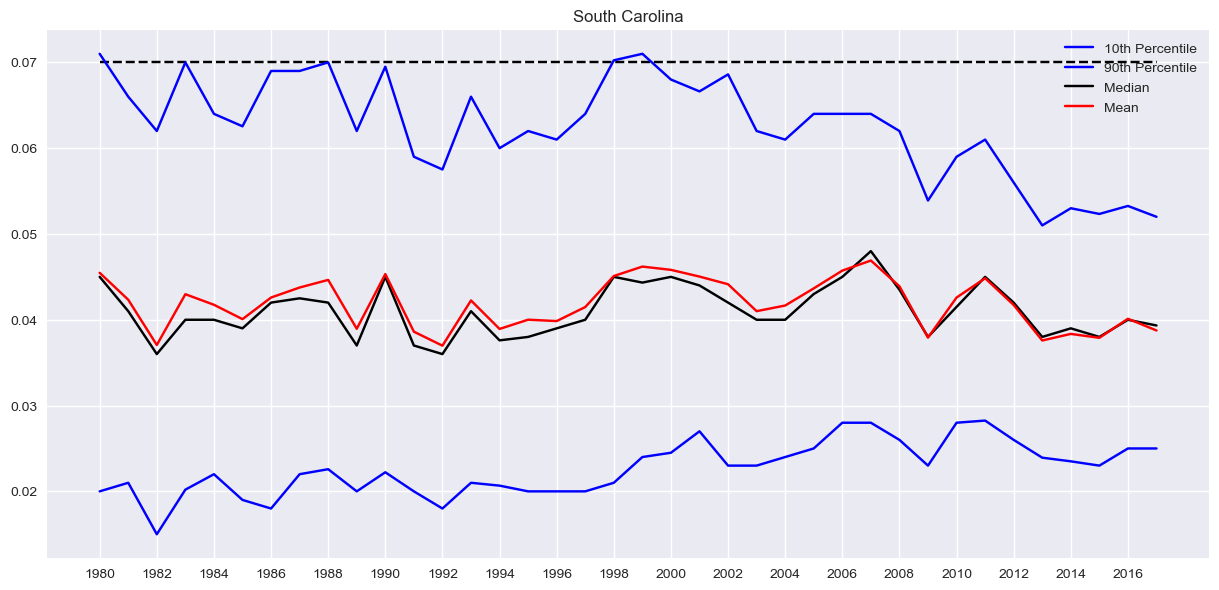

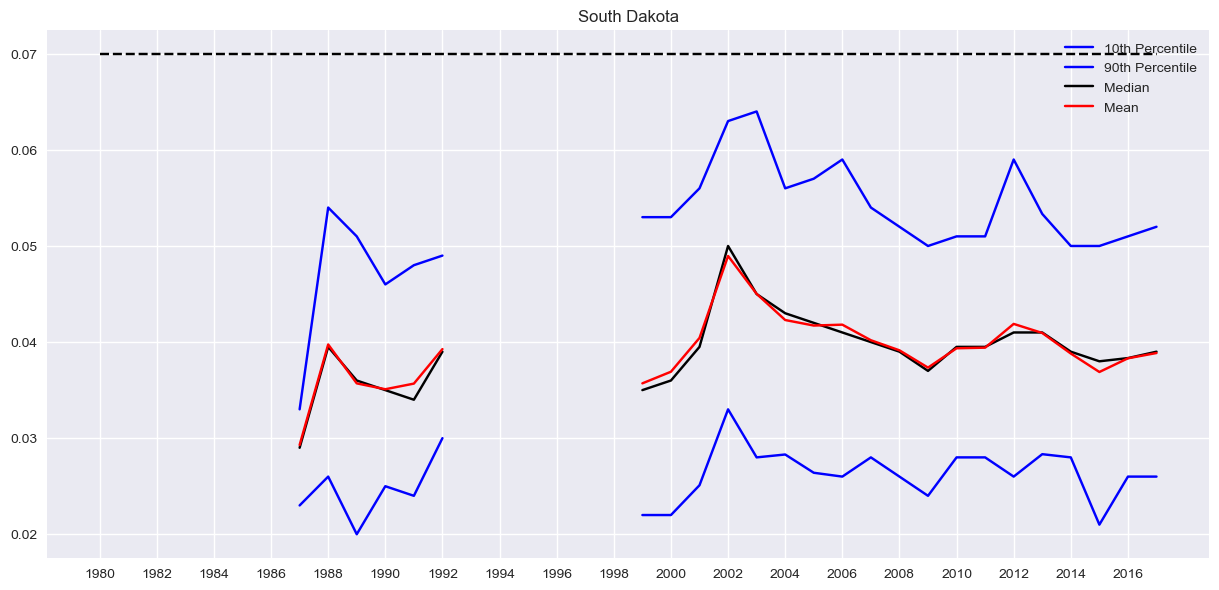

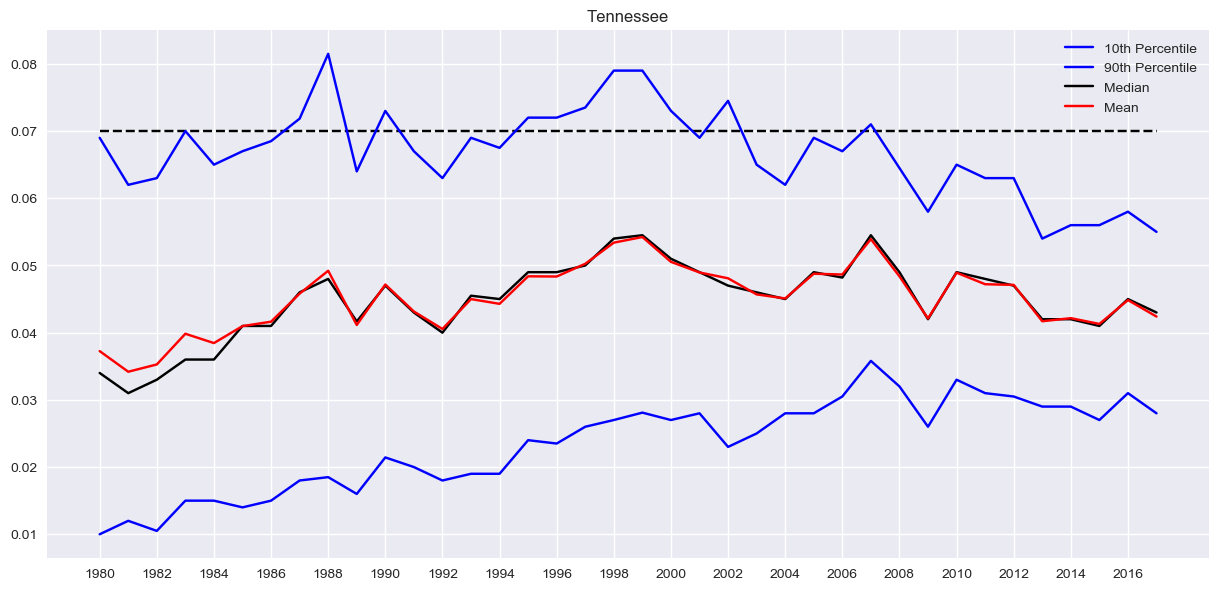

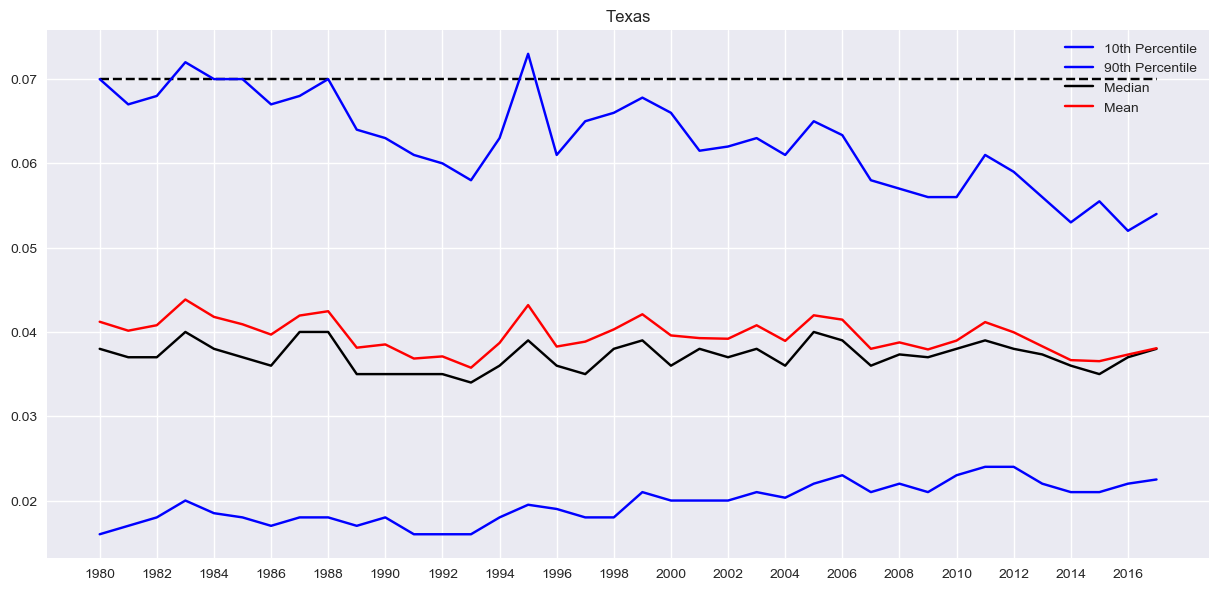

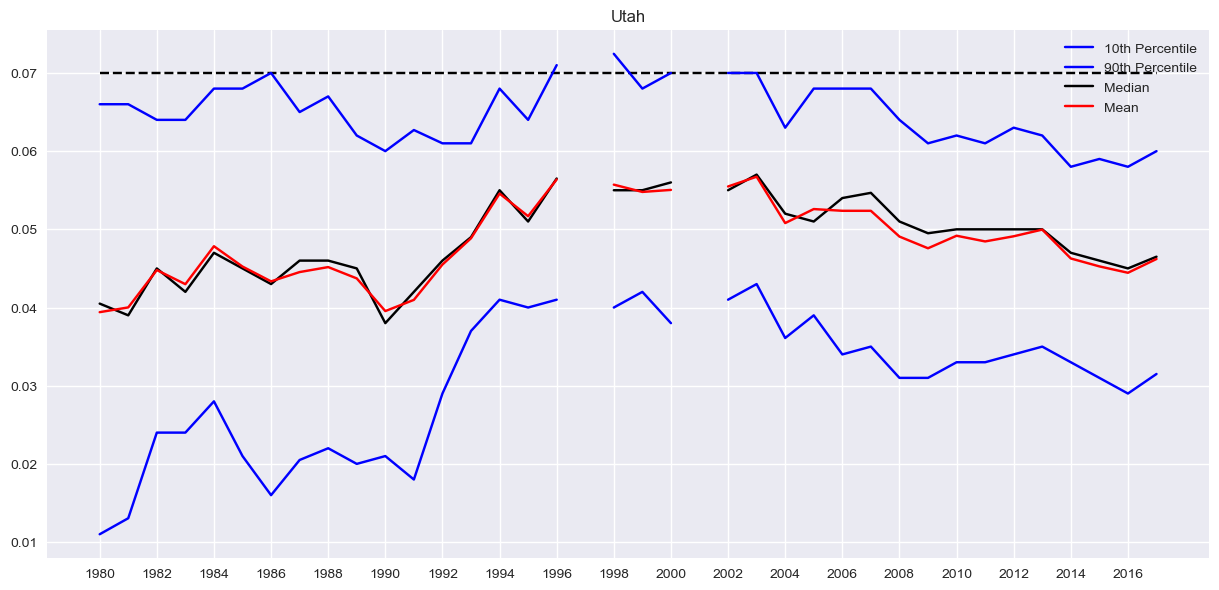

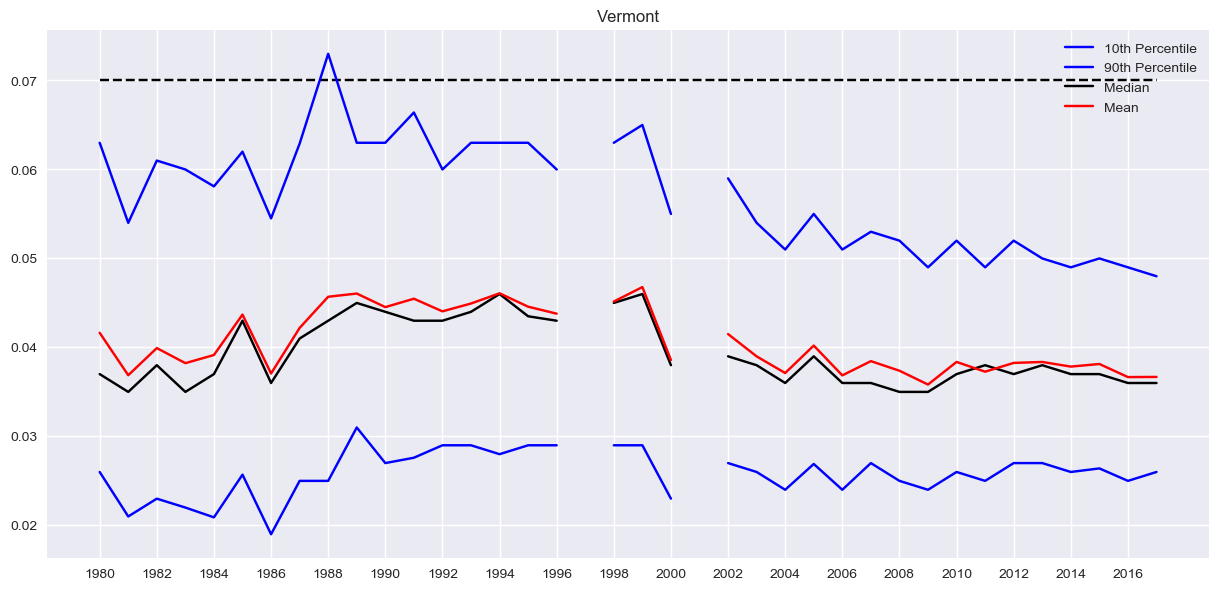

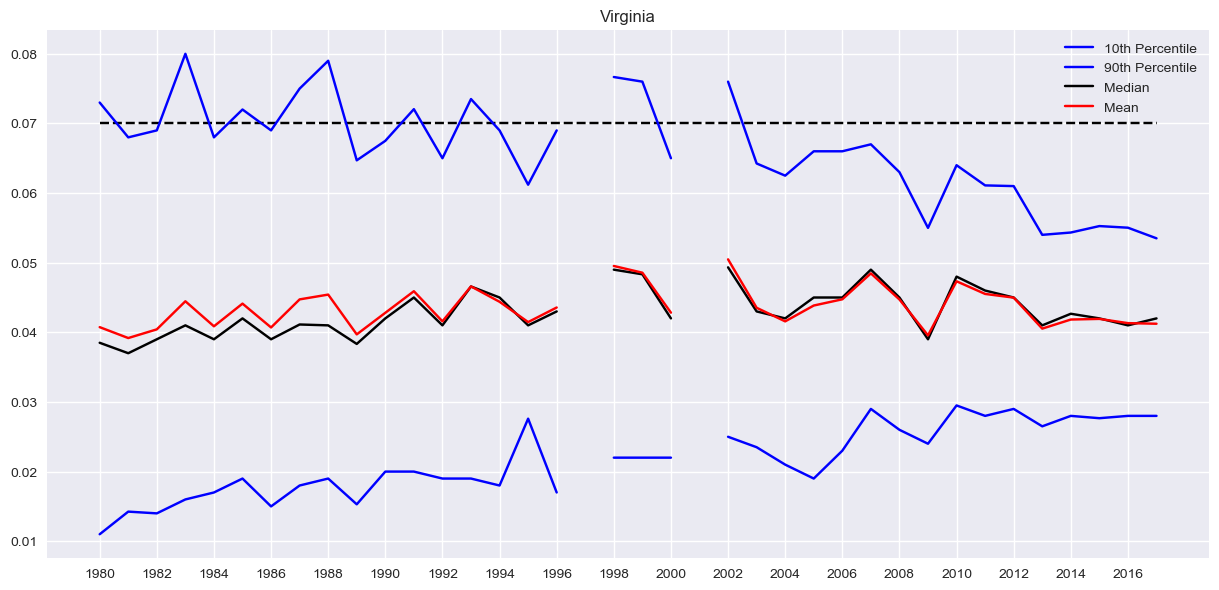

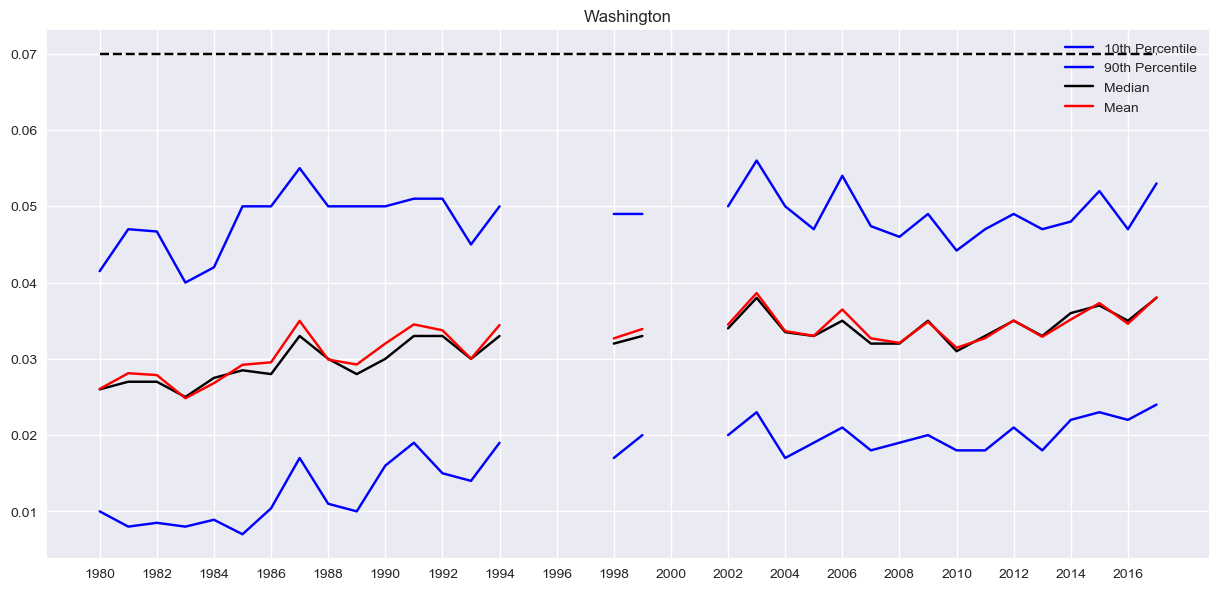

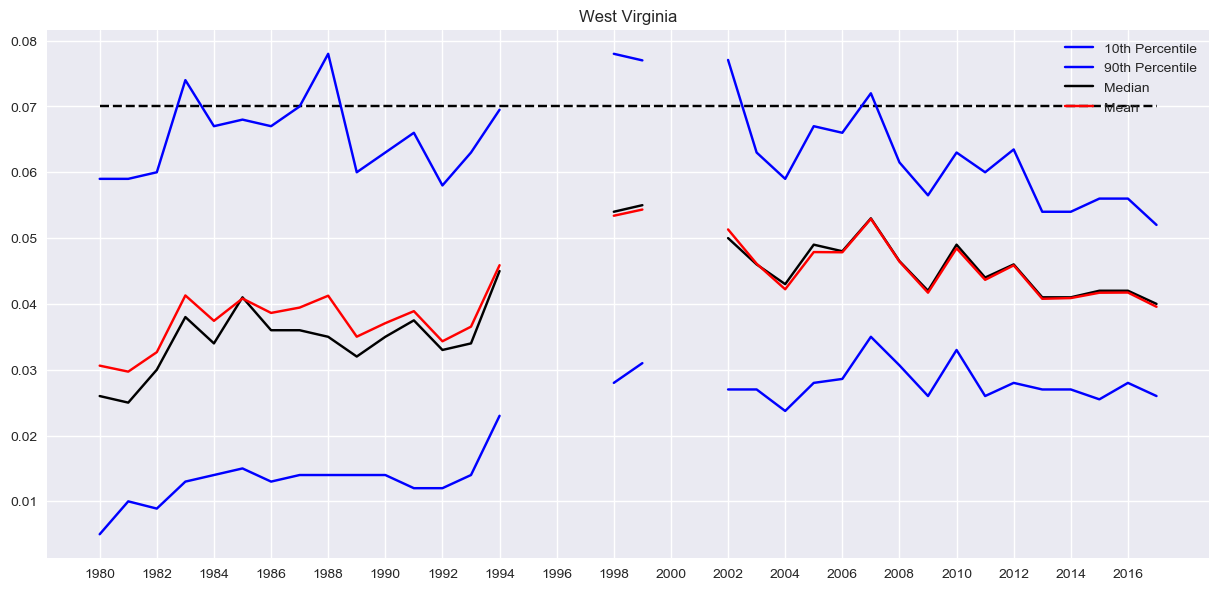

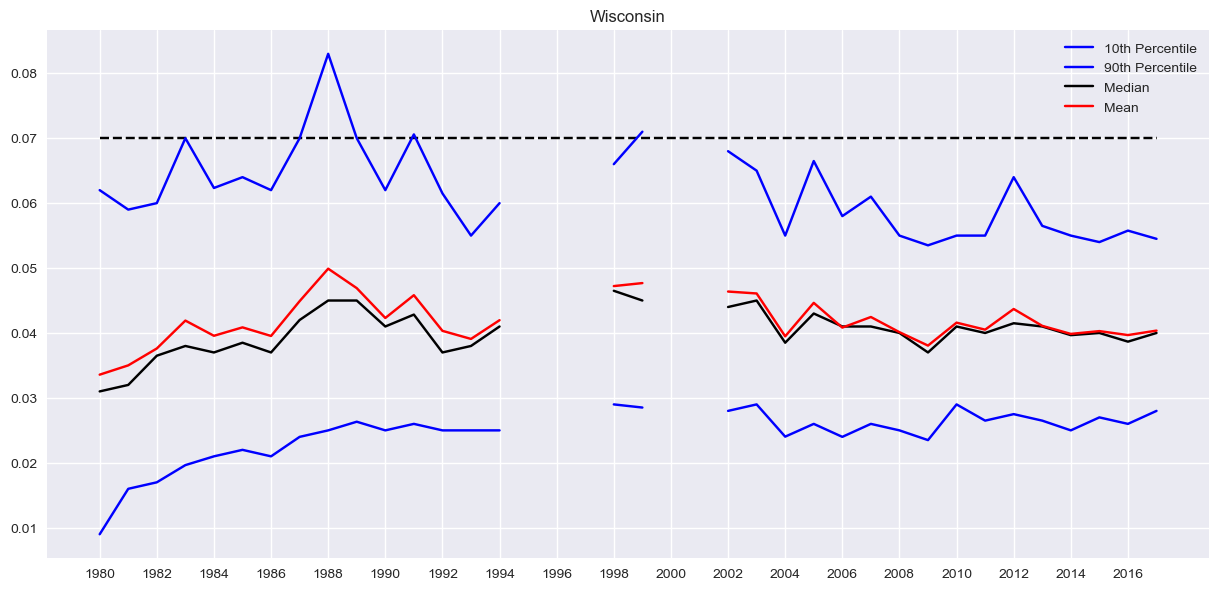

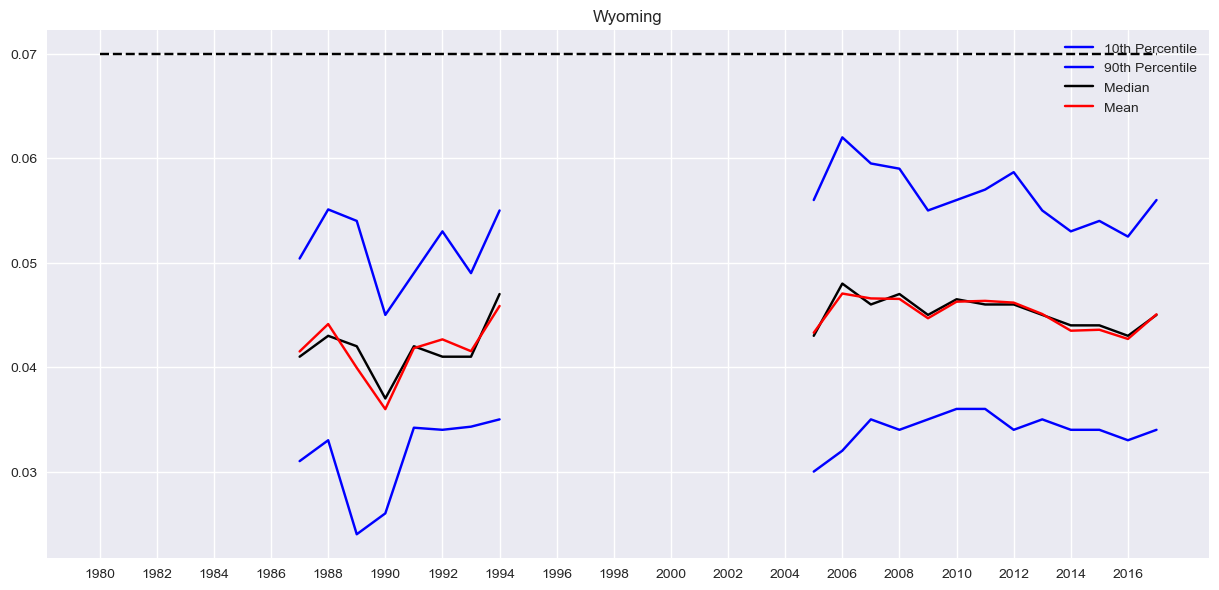

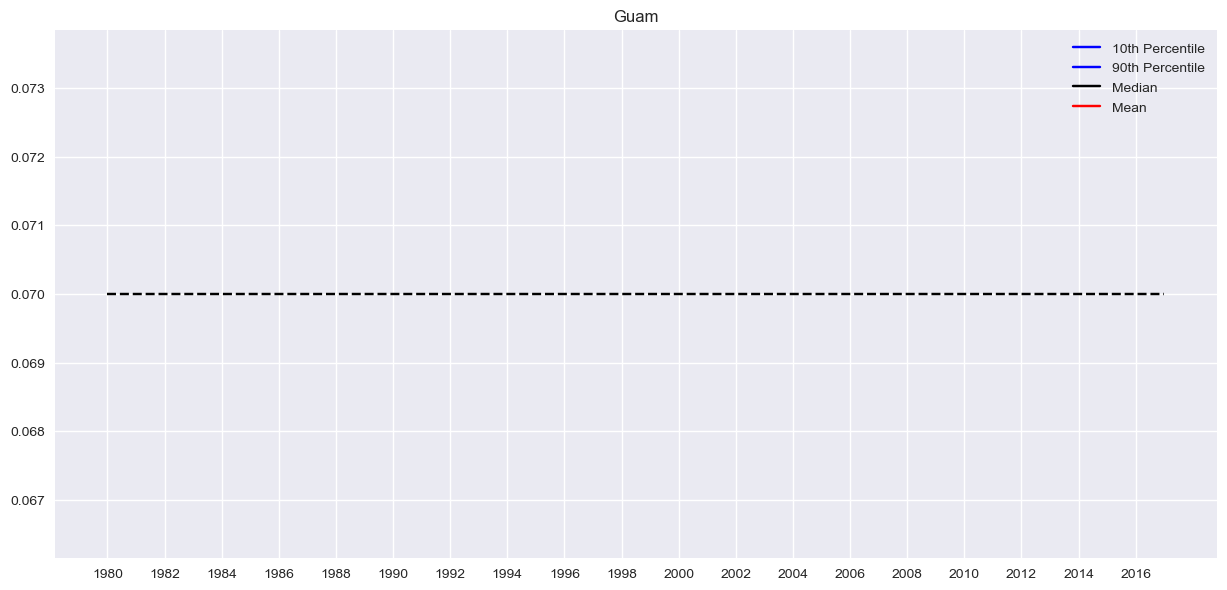

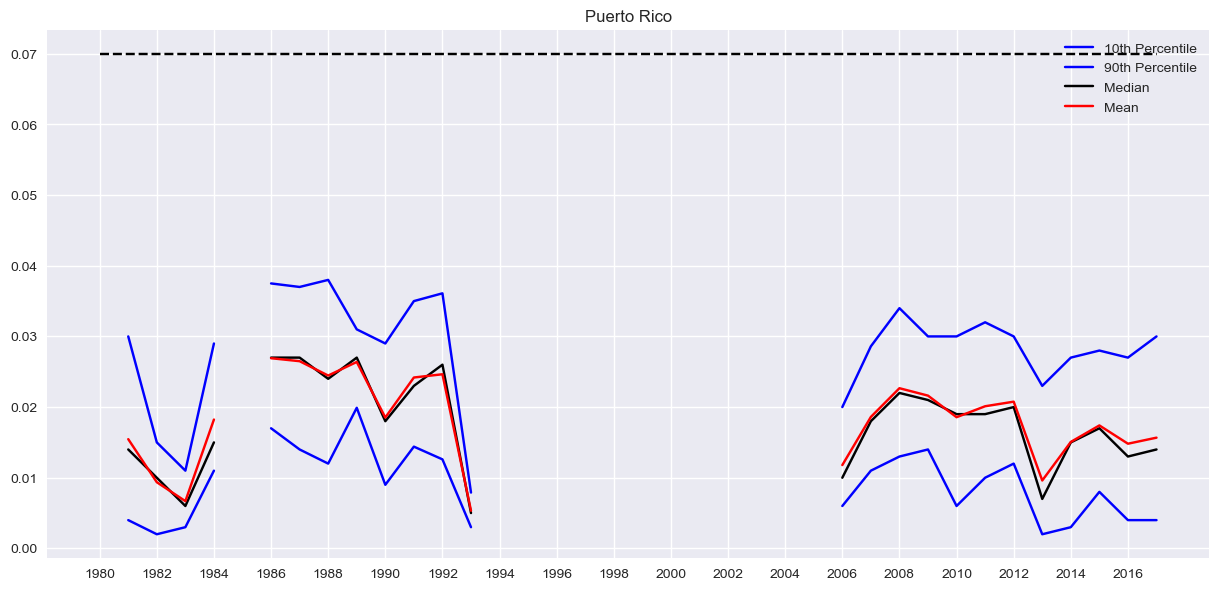

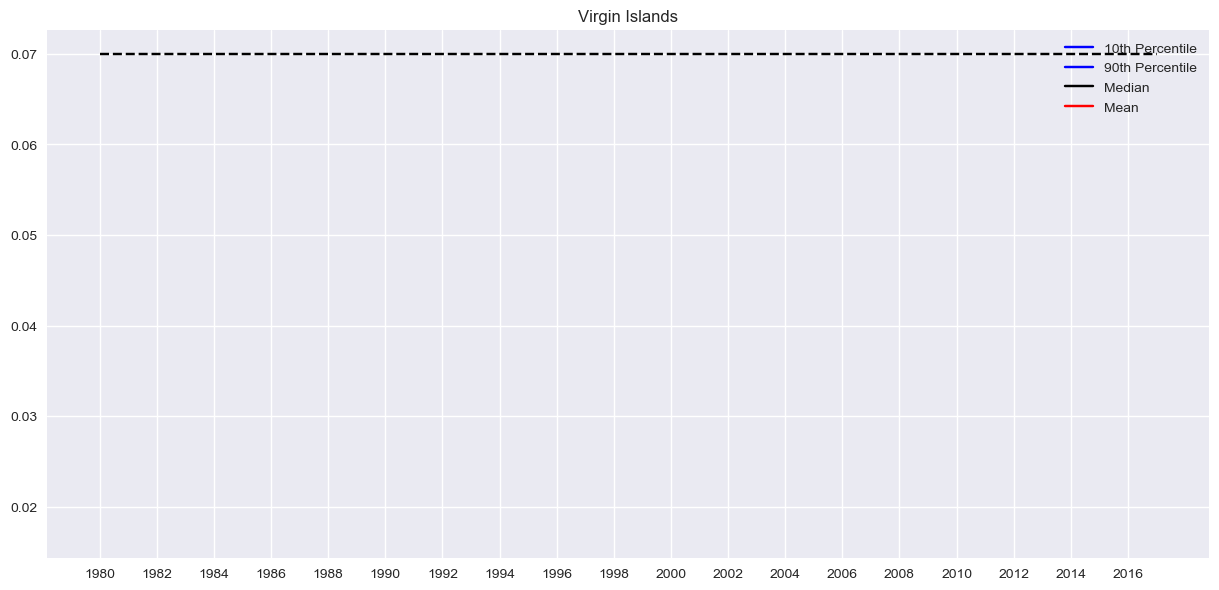

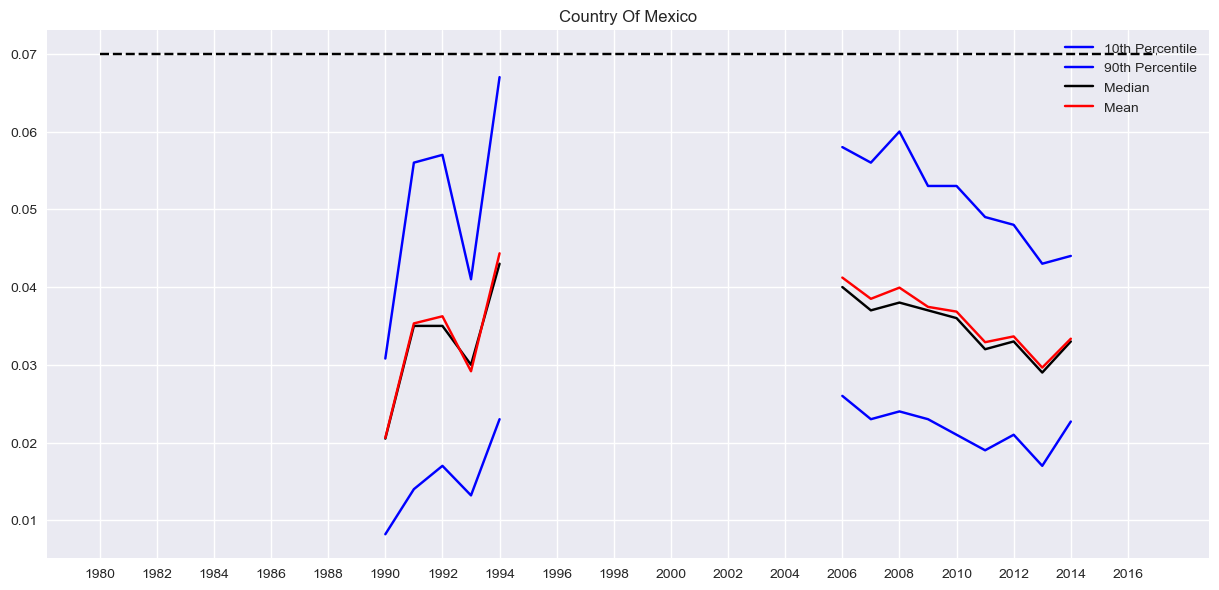

In [5]:
sns.set()
for state in data:
    plt.close()
    plt.subplots(figsize=(15,7),dpi=100)
    plt.plot([i for i in range(len(data[state]))],[data[state][i][0] for i in data[state]],label="10th Percentile",color='b')
    plt.plot([i for i in range(len(data[state]))],[data[state][i][1] for i in data[state]],label="90th Percentile",color='b')
    plt.plot([i for i in range(len(data[state]))],[data[state][i][2] for i in data[state]],label="Median",color='k')
    plt.plot([i for i in range(len(data[state]))],[data[state][i][3] for i in data[state]],label="Mean",color='r')
    plt.xticks([i for i in range(len(data[state]))][::2],[i for i in data[state]][::2])
    plt.hlines(0.070,0,37,color='k',linestyles='--')
    
    #plt.ylim(None,0.36)
    plt.legend(loc='upper right')
    plt.title(stateCodes[int(state)].replace('"',''))
    plt.show()
    #plt.savefig("ozoneConc/{}.png".format(stateCodes[int(state)].replace('"','')),bbox_inches="tight")

In [19]:
info=OrderedDict()
for thres in data:
    n=len(data[thres])
    if thres not in info:
        info[thres]=OrderedDict()
    stateList=list(data[thres].keys())
    for i in range(n):
        for j in range(i+1,n):
            s1=data[thres][stateList[i]]
            s2=data[thres][stateList[j]]
            
            x1=np.mean([s1[k] for k in s1])
            x2=np.mean([s2[k] for k in s2])
            
            num=x1-x2
            var1=np.var([s1[k] for k in s1])
            n1=len([s1[k] for k in s1])
            var2=np.var([s2[k] for k in s2])
            n2=len([s2[k] for k in s2])
            denom=np.sqrt(var1/n1 + var2/n2)
            ttest=num/denom
            stateName1=stateCodes[int(stateList[i])]
            stateName2=stateCodes[int(stateList[j])]
            
            if stateName1 not in info[thres]:
                info[thres][stateName1]=[0,0]
            if stateName2 not in info[thres]:
                info[thres][stateName2] = [0, 0]
            if -2.02<=ttest<=2.02:
                info[thres][stateName1][0]+=1
                info[thres][stateName2][0] += 1
                print(ttest,"Accepted",stateCodes[int(stateList[i])],stateCodes[int(stateList[j])])
            else:
                info[thres][stateName1][1]+=1
                info[thres][stateName2][1] += 1
                #print(ttest,"Rejected",,stateCodes[int(stateList[j])])


1.0354759047 Accepted "Alabama" "Colorado"
-1.237374021 Accepted "Alabama" "Delaware"
-0.113918092622 Accepted "Alabama" "Georgia"
0.185858539111 Accepted "Alabama" "Indiana"
1.15194828501 Accepted "Alabama" "Iowa"
-1.31786175313 Accepted "Alabama" "Kansas"
-1.62030671697 Accepted "Alabama" "Kentucky"
-1.77824534661 Accepted "Alabama" "Louisiana"
-1.62719941622 Accepted "Alabama" "Maine"
-1.56243883922 Accepted "Alabama" "Massachusetts"
-0.749630302996 Accepted "Alabama" "Michigan"
0.76332343764 Accepted "Alabama" "Minnesota"
-1.32848349333 Accepted "Alabama" "Mississippi"
-0.876690267063 Accepted "Alabama" "Missouri"
0.924821777177 Accepted "Alabama" "Nebraska"
-0.563821663202 Accepted "Alabama" "New Hampshire"
0.0427817372098 Accepted "Alabama" "New Mexico"
0.730070092214 Accepted "Alabama" "New York"
-1.51673350356 Accepted "Alabama" "North Carolina"
-0.197337255785 Accepted "Alabama" "Oregon"
-1.17301359394 Accepted "Alabama" "South Carolina"
1.15416365654 Accepted "Alabama" "Tenne

c:\program files (x86)\python36-32\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files (x86)\python36-32\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\program files (x86)\python36-32\lib\site-packages\numpy\core\fromnumeric.py:3146: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
c:\program files (x86)\python36-32\lib\site-packages\numpy\core\_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
c:\program files (x86)\python36-32\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in double_scalars
c:\program fil

 "Delaware" "Minnesota"
0.249929968248 Accepted "Delaware" "Mississippi"
0.529031333667 Accepted "Delaware" "Missouri"
1.76584707299 Accepted "Delaware" "Nebraska"
0.729717996087 Accepted "Delaware" "New Hampshire"
-1.45351333036 Accepted "Delaware" "New Jersey"
1.33714448995 Accepted "Delaware" "New Mexico"
1.95217584026 Accepted "Delaware" "New York"
0.176325275392 Accepted "Delaware" "North Carolina"
-0.930569612531 Accepted "Delaware" "North Dakota"
-1.00152443221 Accepted "Delaware" "Ohio"
-0.44621113111 Accepted "Delaware" "Oklahoma"
1.15291063613 Accepted "Delaware" "Oregon"
-0.63780301517 Accepted "Delaware" "Pennsylvania"
-1.72790652824 Accepted "Delaware" "Rhode Island"
0.339951202141 Accepted "Delaware" "South Carolina"
-1.72790652824 Accepted "Delaware" "Vermont"
-0.798535820056 Accepted "Delaware" "Virginia"
0.809208933481 Accepted "Delaware" "West Virginia"
-0.180447155978 Accepted "Delaware" "Wisconsin"
1.49705499883 Accepted "District Of Columbia" "Kansas"
1.01342341942

-0.403631876977 Accepted "Oklahoma" "Pennsylvania"
1.20477209433 Accepted "Oklahoma" "South Carolina"
-0.769103939304 Accepted "Oklahoma" "Virginia"
1.08244403049 Accepted "Oklahoma" "West Virginia"
0.33568440793 Accepted "Oklahoma" "Wisconsin"
-1.08379447047 Accepted "Oregon" "South Carolina"
1.52346350323 Accepted "Oregon" "Tennessee"
0.28095176266 Accepted "Oregon" "West Virginia"
-1.73637470087 Accepted "Oregon" "Wisconsin"
1.77153127955 Accepted "Oregon" "Wyoming"
1.51194128393 Accepted "Pennsylvania" "South Carolina"
-0.370924380606 Accepted "Pennsylvania" "Virginia"
1.17131324549 Accepted "Pennsylvania" "West Virginia"
0.605326930615 Accepted "Pennsylvania" "Wisconsin"
1.65326685652 Accepted "Rhode Island" "West Virginia"
-1.77441478866 Accepted "South Carolina" "Virginia"
0.680596815127 Accepted "South Carolina" "West Virginia"
-0.670854346487 Accepted "South Carolina" "Wisconsin"
1.9028598718 Accepted "Tennessee" "Utah"
-0.244038713031 Accepted "Tennessee" "West Virginia"
1.22

0.18967742373 Accepted "Connecticut" "Virginia"
-0.492940858105 Accepted "Connecticut" "Wisconsin"
1.49833464239 Accepted "Delaware" "Kansas"
-0.717845742271 Accepted "Delaware" "Louisiana"
1.88952576732 Accepted "Delaware" "Ohio"
1.69396020526 Accepted "Delaware" "Virginia"
0.968768692356 Accepted "Delaware" "Wisconsin"
-0.220047853465 Accepted "Florida" "Mississippi"
1.10895872218 Accepted "Florida" "Tennessee"
0.536919722434 Accepted "Florida" "Texas"
1.73226377627 Accepted "Florida" "Vermont"
1.15379479274 Accepted "Florida" "West Virginia"
-0.066591264297 Accepted "Florida" "Wyoming"
0.429919015112 Accepted "Florida" "Puerto Rico"
-0.939090733304 Accepted "Georgia" "Iowa"
-1.60365126988 Accepted "Georgia" "Minnesota"
2.00376555635 Accepted "Georgia" "Mississippi"
-1.18042975332 Accepted "Georgia" "New York"
-1.68942014137 Accepted "Georgia" "Utah"
-1.37591945402 Accepted "Georgia" "Washington"
1.09815175292 Accepted "Georgia" "Wyoming"
1.3871695767 Accepted "Georgia" "Puerto Rico"

In [20]:
info

OrderedDict([('0.5',
              OrderedDict([('"Alabama"', [25, 27]),
                           ('"Alaska"', [3, 49]),
                           ('"Arizona"', [7, 45]),
                           ('"Arkansas"', [22, 30]),
                           ('"California"', [2, 50]),
                           ('"Colorado"', [16, 36]),
                           ('"Connecticut"', [9, 43]),
                           ('"Delaware"', [35, 17]),
                           ('"District Of Columbia"', [7, 45]),
                           ('"Florida"', [4, 48]),
                           ('"Georgia"', [25, 27]),
                           ('"Hawaii"', [1, 51]),
                           ('"Illinois"', [19, 33]),
                           ('"Indiana"', [20, 32]),
                           ('"Iowa"', [20, 32]),
                           ('"Kansas"', [34, 18]),
                           ('"Kentucky"', [24, 28]),
                           ('"Louisiana"', [26, 26]),
                           ('

In [9]:
a=[1,1,2,3,1]
a.remove[1]

TypeError: 'builtin_function_or_method' object is not subscriptable

In [11]:
a.remove(1)

[2, 3]